<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Начнем изучение датасета, для начала импортируем нужные нам библиотеки и посмотрим на таблицу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
m = Mystem()
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #путь яндекса
except:
    df = pd.read_csv('real_estate_data.csv') # если же ошибка - мой путь

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим на количество пропусков в каждом столбце в процентном соотношении

In [5]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


### Вывод

Мы видим, что в некоторых столбцах процент пропусков очень большой, но так же видно, что в некоторых столбцах можно предположить логичную замену например: balcony, is_apartment, тоесть тут либо есть балконы и указано их количество, либо их просто нет. Тоже самое и с апппратаментами, либо они есть и указаны, либо их нет.

## Предобработка данных

Удалим пропущенные значения в столбцах locality_name и floors_total, их слишком маленькое количество относительного общего, это не должно некоректно повлиять на наше иследование.

In [6]:
df=df.dropna(subset = ['locality_name','floors_total']).reset_index(drop=True)

In [7]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')# Проверим получилось ли удалить значения

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.55
floors_total,0
living_area,7.91
floor,0
is_apartment,88.29


Заменим пропуски в столбцах balcony, days_exposition и is_apartment нулями. А в остальном датафрейме пропущенные значения оставим как есть

In [8]:
df['balcony']=df['balcony'].fillna(0)
df['is_apartment']=df['is_apartment'].fillna(0)
df['days_exposition']=df['days_exposition'].fillna(0)

In [9]:
for type_unique in df['locality_name'].unique():
    df.loc[(df['cityCenters_nearest'].isna())&(df['locality_name'] == type_unique), 'cityCenters_nearest'] = \
    df.loc[df['locality_name'] ==type_unique, 'cityCenters_nearest'].median()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


приведем где это возможно значения к целочисленному виду

In [10]:
df['floors_total']=df['floors_total'].astype('int64')
df['balcony']=df['balcony'].astype('int64')
df['days_exposition']=df['days_exposition'].astype('int64')          

А в столбце is_apartment к булевому типу

In [11]:
df['is_apartment'] = pd.to_numeric(df['is_apartment'])   
df['is_apartment']=df['is_apartment'].astype('bool')

Заменим имя столбцов, приведем его к змеиному регистру и с маленькой буквы

In [12]:
df=df.rename(columns={'cityCenters_nearest':'city_centers_nearest','parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000' })

In [13]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')# Проверим получилось ли удалить значения

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.55
floors_total,0
living_area,7.91
floor,0
is_apartment,0


Посмотрим на значения столбца rooms

In [14]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Скорей всего где есть 0, это квартира студия, заменим там значения 0 на 1, где в столбце studio стоит студия.

In [15]:
df.loc[(df['rooms']== 0) & (df['studio']== True), 'rooms'] = 1

Заполним пропуски жилой площади медианным значением по однотипным квартирам

In [16]:
for i in df['rooms'].unique():
    df.loc[(df['living_area'].isna()) & (df['rooms'] == i), 'living_area'] = df.loc[df['rooms'] == i, 'living_area'].median()

Сделаем тоже самое для кухни

In [17]:
for i in df['rooms'].unique():
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == i), 'kitchen_area'] = df.loc[df['rooms'] == i, 'kitchen_area'].median()

Проверим

In [18]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')# Проверим получилось ли удалить значения

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.55
floors_total,0
living_area,0
floor,0
is_apartment,0


удалим не изменяемые значения 0,25% это не повлияет на результат

In [19]:
df=df.dropna(subset = ['kitchen_area']).reset_index(drop=True)

Как мы видим, что от пропусков избавились.

Мы видим повторяющиеся значения с разными буквами в написании, например: поселок и посёлок, чтобы избежать неточностей, выведем оригинальные названия населенных пунктов locality_name.

In [20]:
df['locality_name'] = df.apply(lambda x: ' '.join([x for x in str(x['locality_name']).split() if x[0] == x[0].upper()]), axis=1)

In [21]:
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

Проверим на дубликаты

In [22]:
df.duplicated().sum()

0

Дубликатов нет, где была возможность избавились от пропусков, заменили тип данных, продолжаем изучать наш датафрейм

## Расчёты и добавление результатов в таблицу

расчитаем стоимость квадратного метра и добавим его в новый столбец и округлим до 1 знака после запятой

In [23]:
df['price_square_meter'] = (round(df['last_price'] / df['total_area'],1))

Добавим столбец с датой

In [24]:
df['day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Напишем функцию для объединения этажей по типам: первый, последний и другие этажи.

In [25]:
def etaj (row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другие' 


In [26]:
df['floor_group'] = df.apply(etaj, axis=1)

Добавим столбец с отношением жилой площади к общей, а также столбец с соотношением кухни к общей площади, так же добавим столбец с округленными значениями до центра города в км, округлим значения до 1 знака после запятой и выведем на экран 5 случайных строк

In [27]:
df['liv_tot_area'] = round(df['living_area'] / df['total_area'],1)

In [28]:
df['kit_tot_area'] = round(df['kitchen_area'] / df['total_area'],1)

In [29]:
df['sp_center'] = (df['city_centers_nearest']  /1000).round(0)

так же добавим столбцы дня недели размещения объявления и месяца

In [30]:
df['weekday_exposition'] =df['day_exposition'].dt.weekday

In [31]:
df['month_exposition'] =df['day_exposition'].dt.month

In [32]:
df['year_exposition'] = df['day_exposition'].dt.year

In [33]:
display(df.sample(5))#Проверим что получилось на случайных 15 строчках

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_square_meter,day_exposition,floor_group,liv_tot_area,kit_tot_area,sp_center,weekday_exposition,month_exposition,year_exposition
22959,8,5780000.0,55.0,2017-11-23T00:00:00,2,2.55,10,28.6,8,False,...,41,105090.9,2017-11-23,Другие,0.5,0.1,11.0,3,11,2017
19743,11,4500000.0,45.1,2019-04-17T00:00:00,2,2.50,5,28.7,4,False,...,0,99778.3,2019-04-17,Другие,0.6,0.1,11.0,2,4,2019
6792,9,5150000.0,50.0,2018-02-27T00:00:00,2,NaN,12,31.0,3,False,...,15,103000.0,2018-02-27,Другие,0.6,0.2,11.0,1,2,2018
13673,4,5600000.0,67.9,2015-06-02T00:00:00,3,2.60,9,43.0,6,False,...,0,82474.2,2015-06-02,Другие,0.6,0.1,34.0,1,6,2015
915,20,4380000.0,78.0,2019-04-15T00:00:00,3,2.53,10,48.8,6,False,...,0,56153.8,2019-04-15,Другие,0.6,0.1,NaN,0,4,2019


Вывод: Мы произвели несколько расчетов и добавили их в новые столбцы.

## Исследовательский анализ данных

Изучим параметры, такие как: площадь, цена, число комнат, высота потолков и построем гистограмму для каждого из параметров

In [34]:
df['total_area'].value_counts()

45.00     419
42.00     383
60.00     346
31.00     345
44.00     343
         ... 
55.39       1
137.40      1
54.12       1
163.33      1
23.55       1
Name: total_area, Length: 2150, dtype: int64

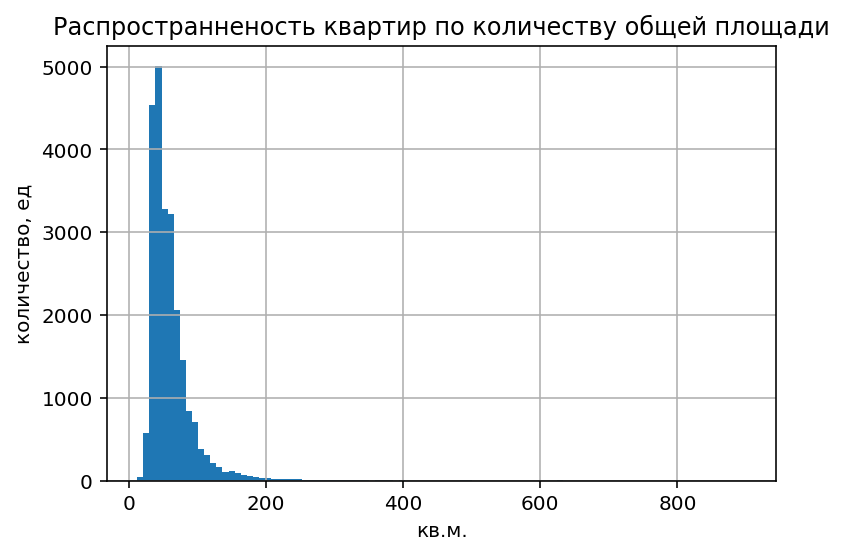

In [35]:
plt.hist(df['total_area'], bins=100)

plt.title('Распространненость квартир по количеству общей площади')
plt.xlabel('кв.м.')
plt.ylabel('количество, ед')
plt.grid()

plt.show()

Мы видим, что большое чем больше площадь, тем менее часто она встречается, основная площадь все таки 40-100 кв. м.

In [36]:
df['last_price'].value_counts()

4500000.0    341
3500000.0    288
4000000.0    260
4300000.0    260
4200000.0    258
            ... 
1678000.0      1
5925657.0      1
7725000.0      1
2660000.0      1
6029433.0      1
Name: last_price, Length: 2923, dtype: int64

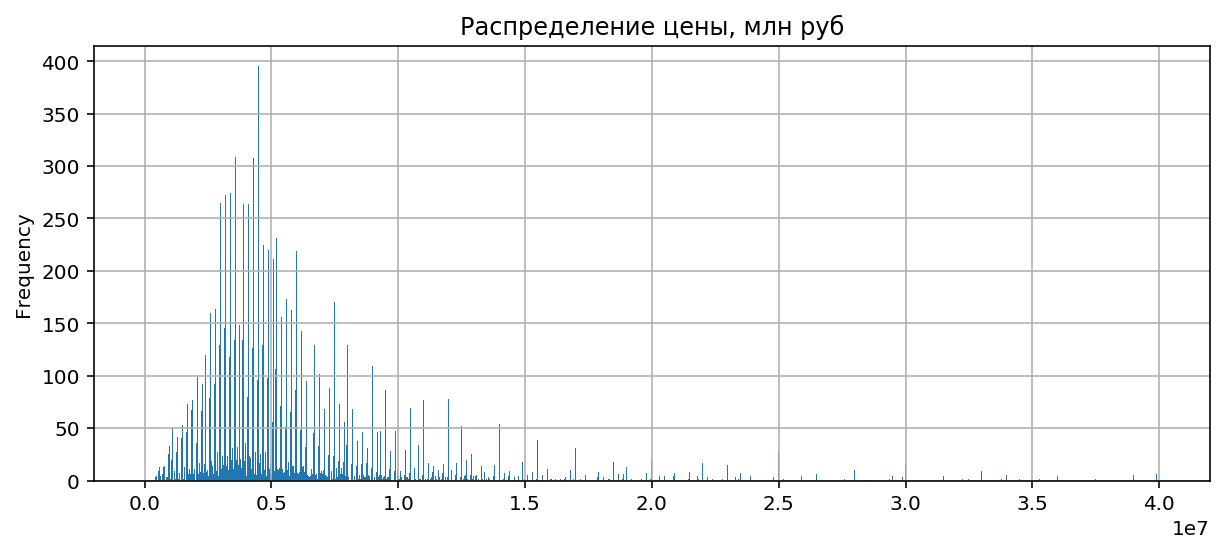

In [37]:
df.plot(y = 'last_price', title='Распределение цены, млн руб', kind='hist', bins=2000,  grid=True, figsize = (10,4), range = (1, 40000000), legend=False)
plt.show()

Мы видим, что основной костяк квартир это примерно 4,5-6 млн рублей.

In [38]:
df['rooms'].value_counts()

1     8139
2     7897
3     5779
4     1172
5      325
6      104
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

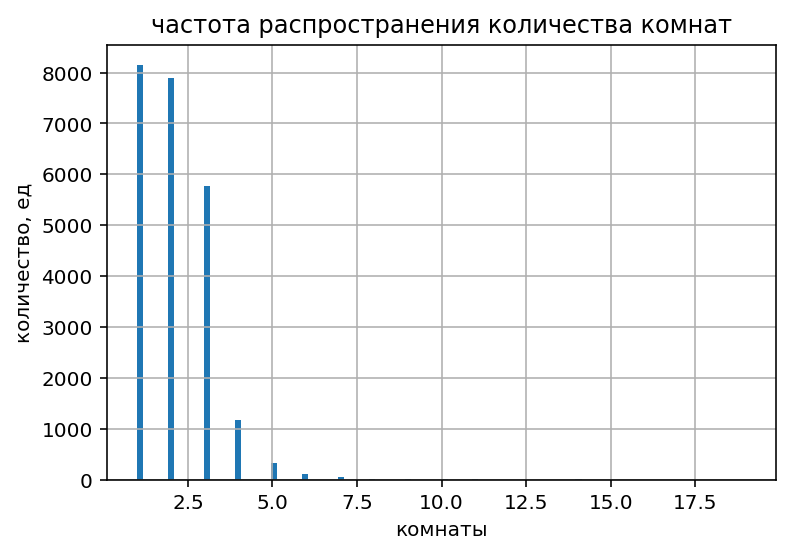

In [39]:
plt.hist(df['rooms'], bins=100) #строим график по квартирам

plt.title('частота распространения количества комнат')
plt.xlabel('комнаты')
plt.ylabel('количество, ед')
plt.grid()

plt.show()


Мы видим, что особо популярны 1,2 и 3х комнатные квартиры, остальные пользуются меньшим спросом

In [40]:
df['ceiling_height'].value_counts()

2.50      3515
2.60      1645
2.70      1568
3.00      1108
2.80       984
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

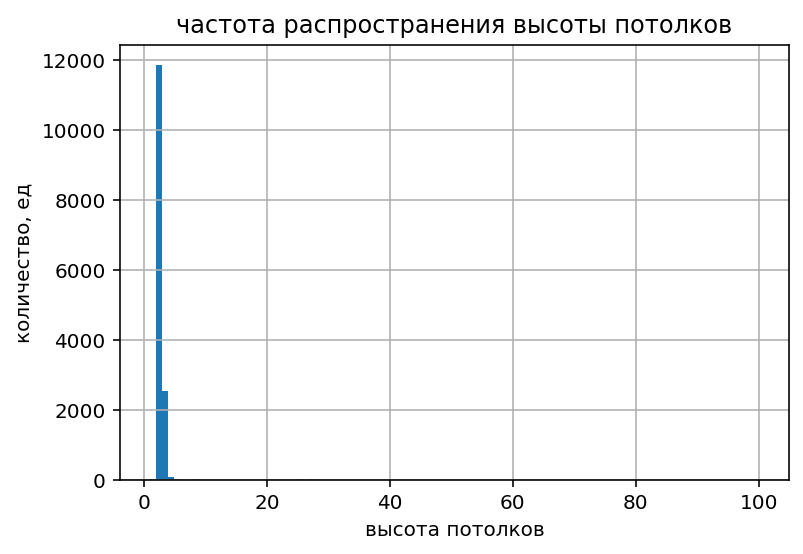

In [41]:
plt.hist(df['ceiling_height'], bins=100)

plt.title('частота распространения высоты потолков')
plt.xlabel('высота потолков')
plt.ylabel('количество, ед')
plt.grid()

plt.show()

Весь пик высоты потолков сосредоточен в одном месте, это 2,5-3 метра. что в принципе и похоже на правду

In [42]:
df['days_exposition'].value_counts().sort_values(ascending=False)

0       3171
45       869
60       538
7        231
30       208
        ... 
762        1
842        1
890        1
906        1
1127       1
Name: days_exposition, Length: 1140, dtype: int64

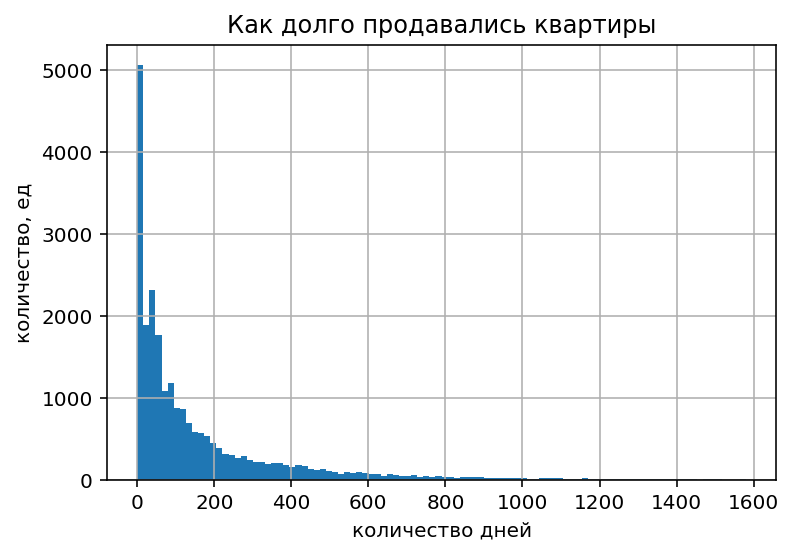

In [43]:
plt.hist(df['days_exposition'], bins=100)

plt.title('Как долго продавались квартиры')
plt.xlabel('количество дней')
plt.ylabel('количество, ед')
plt.grid()

plt.show()


In [44]:
df['days_exposition'].describe()

count    23506.000000
mean       156.618268
std        213.686068
min          0.000000
25%         22.000000
50%         73.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

 Мы видим, что в районе 0 дней находится пик значений, скорей всего это выбросы и в хвосте графика тоже есть выброс. установим время продажи минимальное 8 дней, т.к. с нашей бюрократической системой практически не реально успеть продать квартиру быстрее и максимальное время не позже 1200 дней, сделаем выборку и сохраним в новую переменную.

In [45]:
df['temp_days']= df.query('8 <= days_exposition <= 1200')['days_exposition']
df['temp_days'].describe()

count    19407.000000
mean       183.307724
std        207.754405
min          8.000000
25%         45.000000
50%        102.000000
75%        238.000000
max       1200.000000
Name: temp_days, dtype: float64

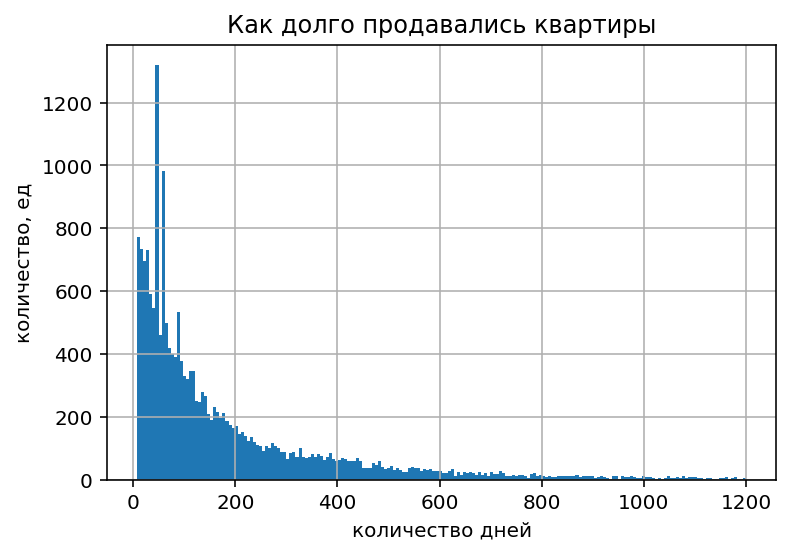

In [46]:
plt.hist(df['temp_days'], bins=200)#Посмотрим на новый график с отсеченными выбросами
plt.title('Как долго продавались квартиры')
plt.xlabel('количество дней')
plt.ylabel('количество, ед')
plt.grid()

plt.show()


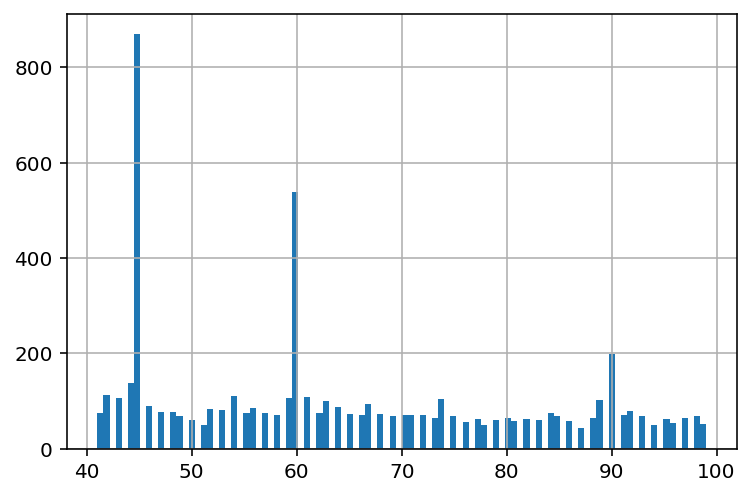

In [47]:
df.query('40 < temp_days < 100')['temp_days'].hist(bins=100)#Теперь взглянем более подробно, чтобы определить выделяющиеся значения
plt.show()

Сделаем выборку из выделяющихся значений и посмотрим на получившуюся гистограмму

In [48]:
df_no_vibros = df.query('temp_days != 45 & temp_days != 60 & temp_days != 90')

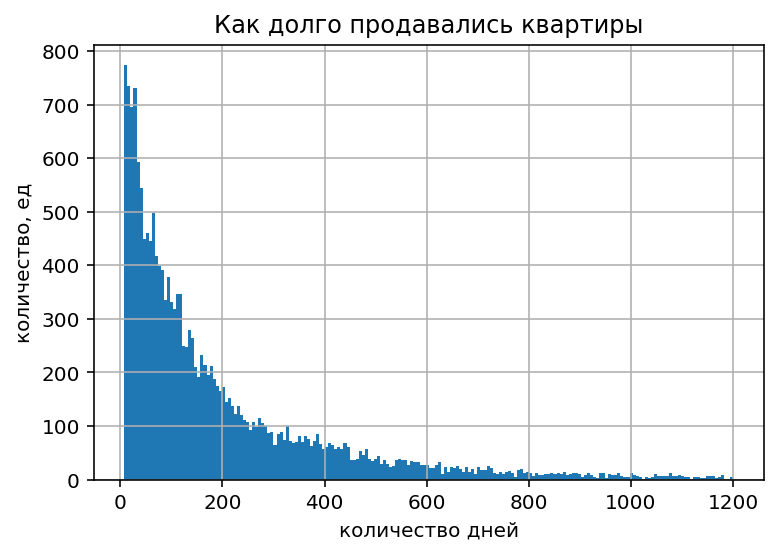

In [49]:
plt.hist(df_no_vibros['temp_days'], bins=200)#Посмотрим на новый график с отсеченными выбросами
plt.title('Как долго продавались квартиры')
plt.xlabel('количество дней')
plt.ylabel('количество, ед')
plt.grid()

plt.show()

In [50]:
df_no_vibros['temp_days'].describe()

count    17801.000000
mean       194.829392
std        213.149308
min          8.000000
25%         49.000000
50%        116.000000
75%        261.000000
max       1200.000000
Name: temp_days, dtype: float64

In [51]:
len(df_no_vibros) / len(df)#посмотрим какую долю занимают все выделяющиеся значения

0.9316770186335404

Получается доля выделяющихся значений целых 10% от общего количества.

Мы видим, что значения медианы немного подросла как и среднее, но  в целом график выглядит лучше и стабильнее. Получается оптимальное время продажи квартиры 116 дней. 

In [52]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_square_meter,day_exposition,floor_group,liv_tot_area,kit_tot_area,sp_center,weekday_exposition,month_exposition,year_exposition,temp_days
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,120370.4,2019-03-07,Другие,0.5,0.2,16.0,3,3,2019,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,False,...,82920.8,2018-12-04,Первый,0.5,0.3,19.0,1,12,2018,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,False,...,92785.7,2015-08-20,Другие,0.6,0.1,14.0,3,8,2015,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,45.0,9,False,...,408176.1,2015-07-24,Другие,0.3,0.1,7.0,4,7,2015,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,100000.0,2018-06-19,Другие,0.3,0.4,8.0,1,6,2018,121.0


Создадим переменную и посмотрим зависимость цены от площади квартиры, количества комнат и удаления от центра города

In [53]:
temp_df = df_no_vibros[['last_price', 'total_area', 'rooms', 'city_centers_nearest', ]]

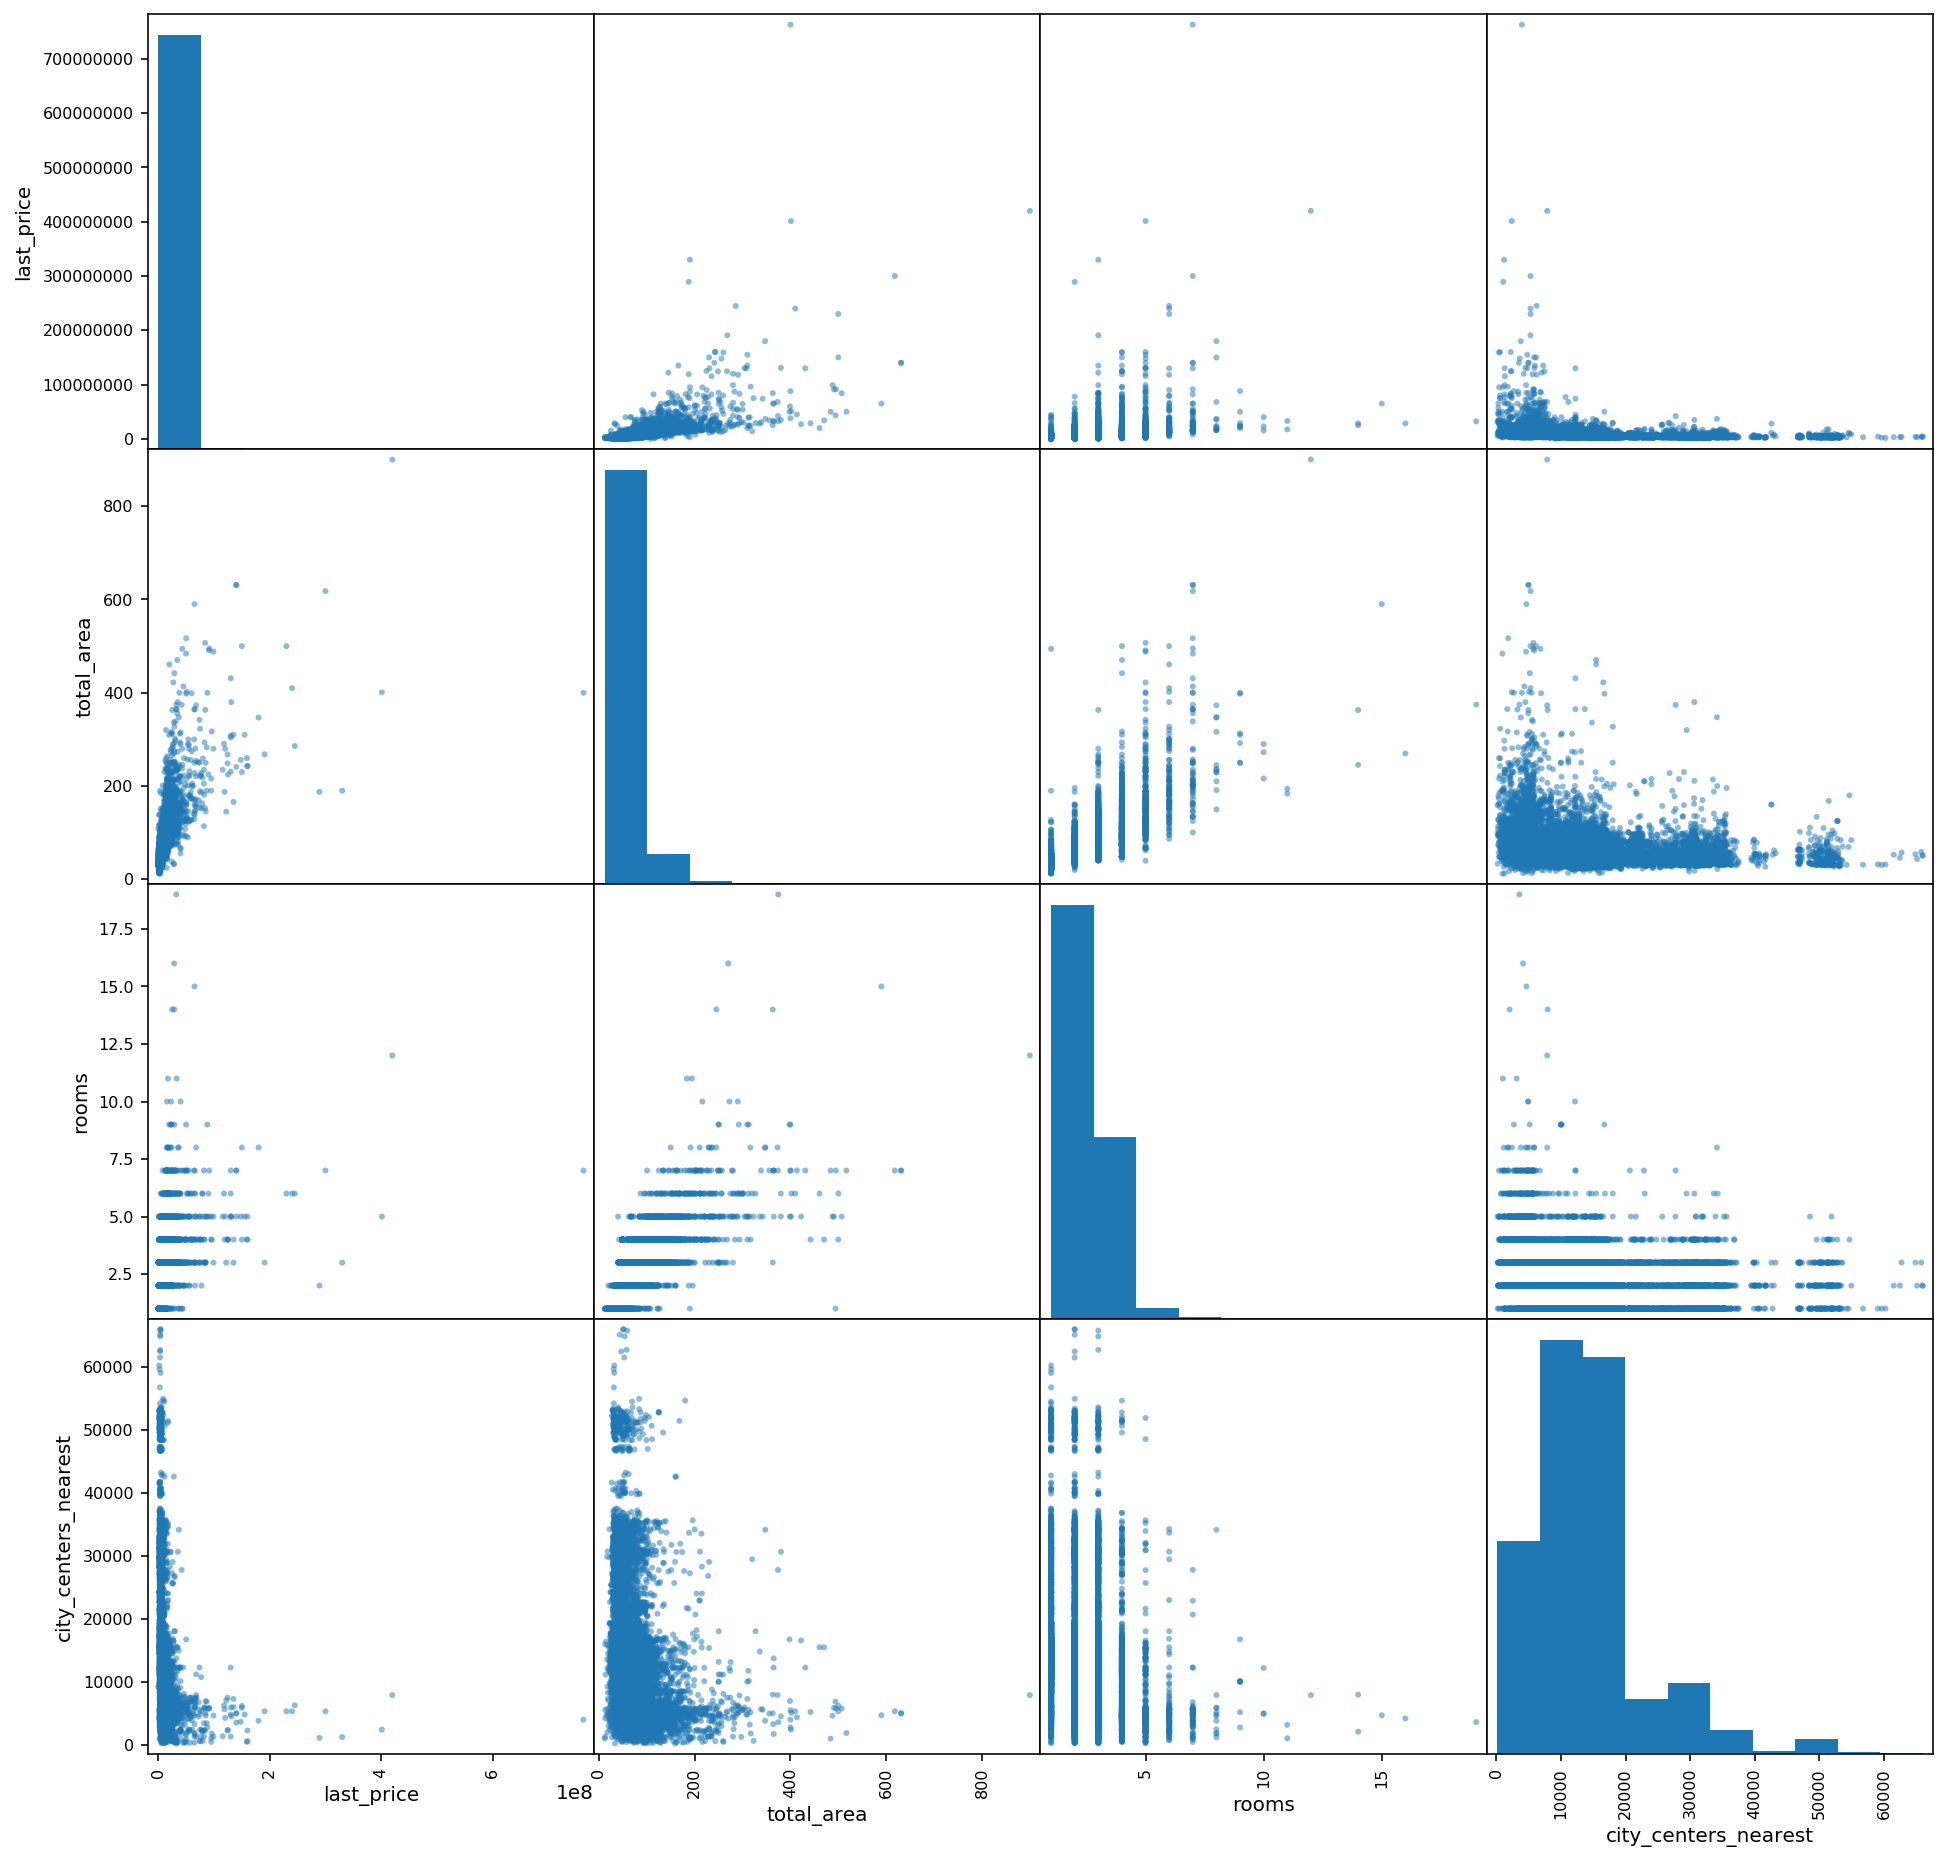

In [54]:
pd.plotting.scatter_matrix(temp_df, figsize=(16, 16)) 
plt.show()

In [55]:
temp_df.corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.653815,0.365287,-0.204259
total_area,0.653815,1.000000,0.761039,-0.230562
rooms,0.365287,0.761039,1.000000,-0.188441
city_centers_nearest,-0.204259,-0.230562,-0.188441,1.000000


Исходя из данных графиков мы видим, что есть небольшая зависимость цены от площади квартиры и зависимость количества комнат от  площади квартиры, что в принципе очевидно, чем больше площадь, тем больше комнат и тем дороже квартира.

Проверим так же, есть ли зависимость цены от доли жилой площади от общей и доли занимаемой кухни от общей площади, а так же высоты потолков

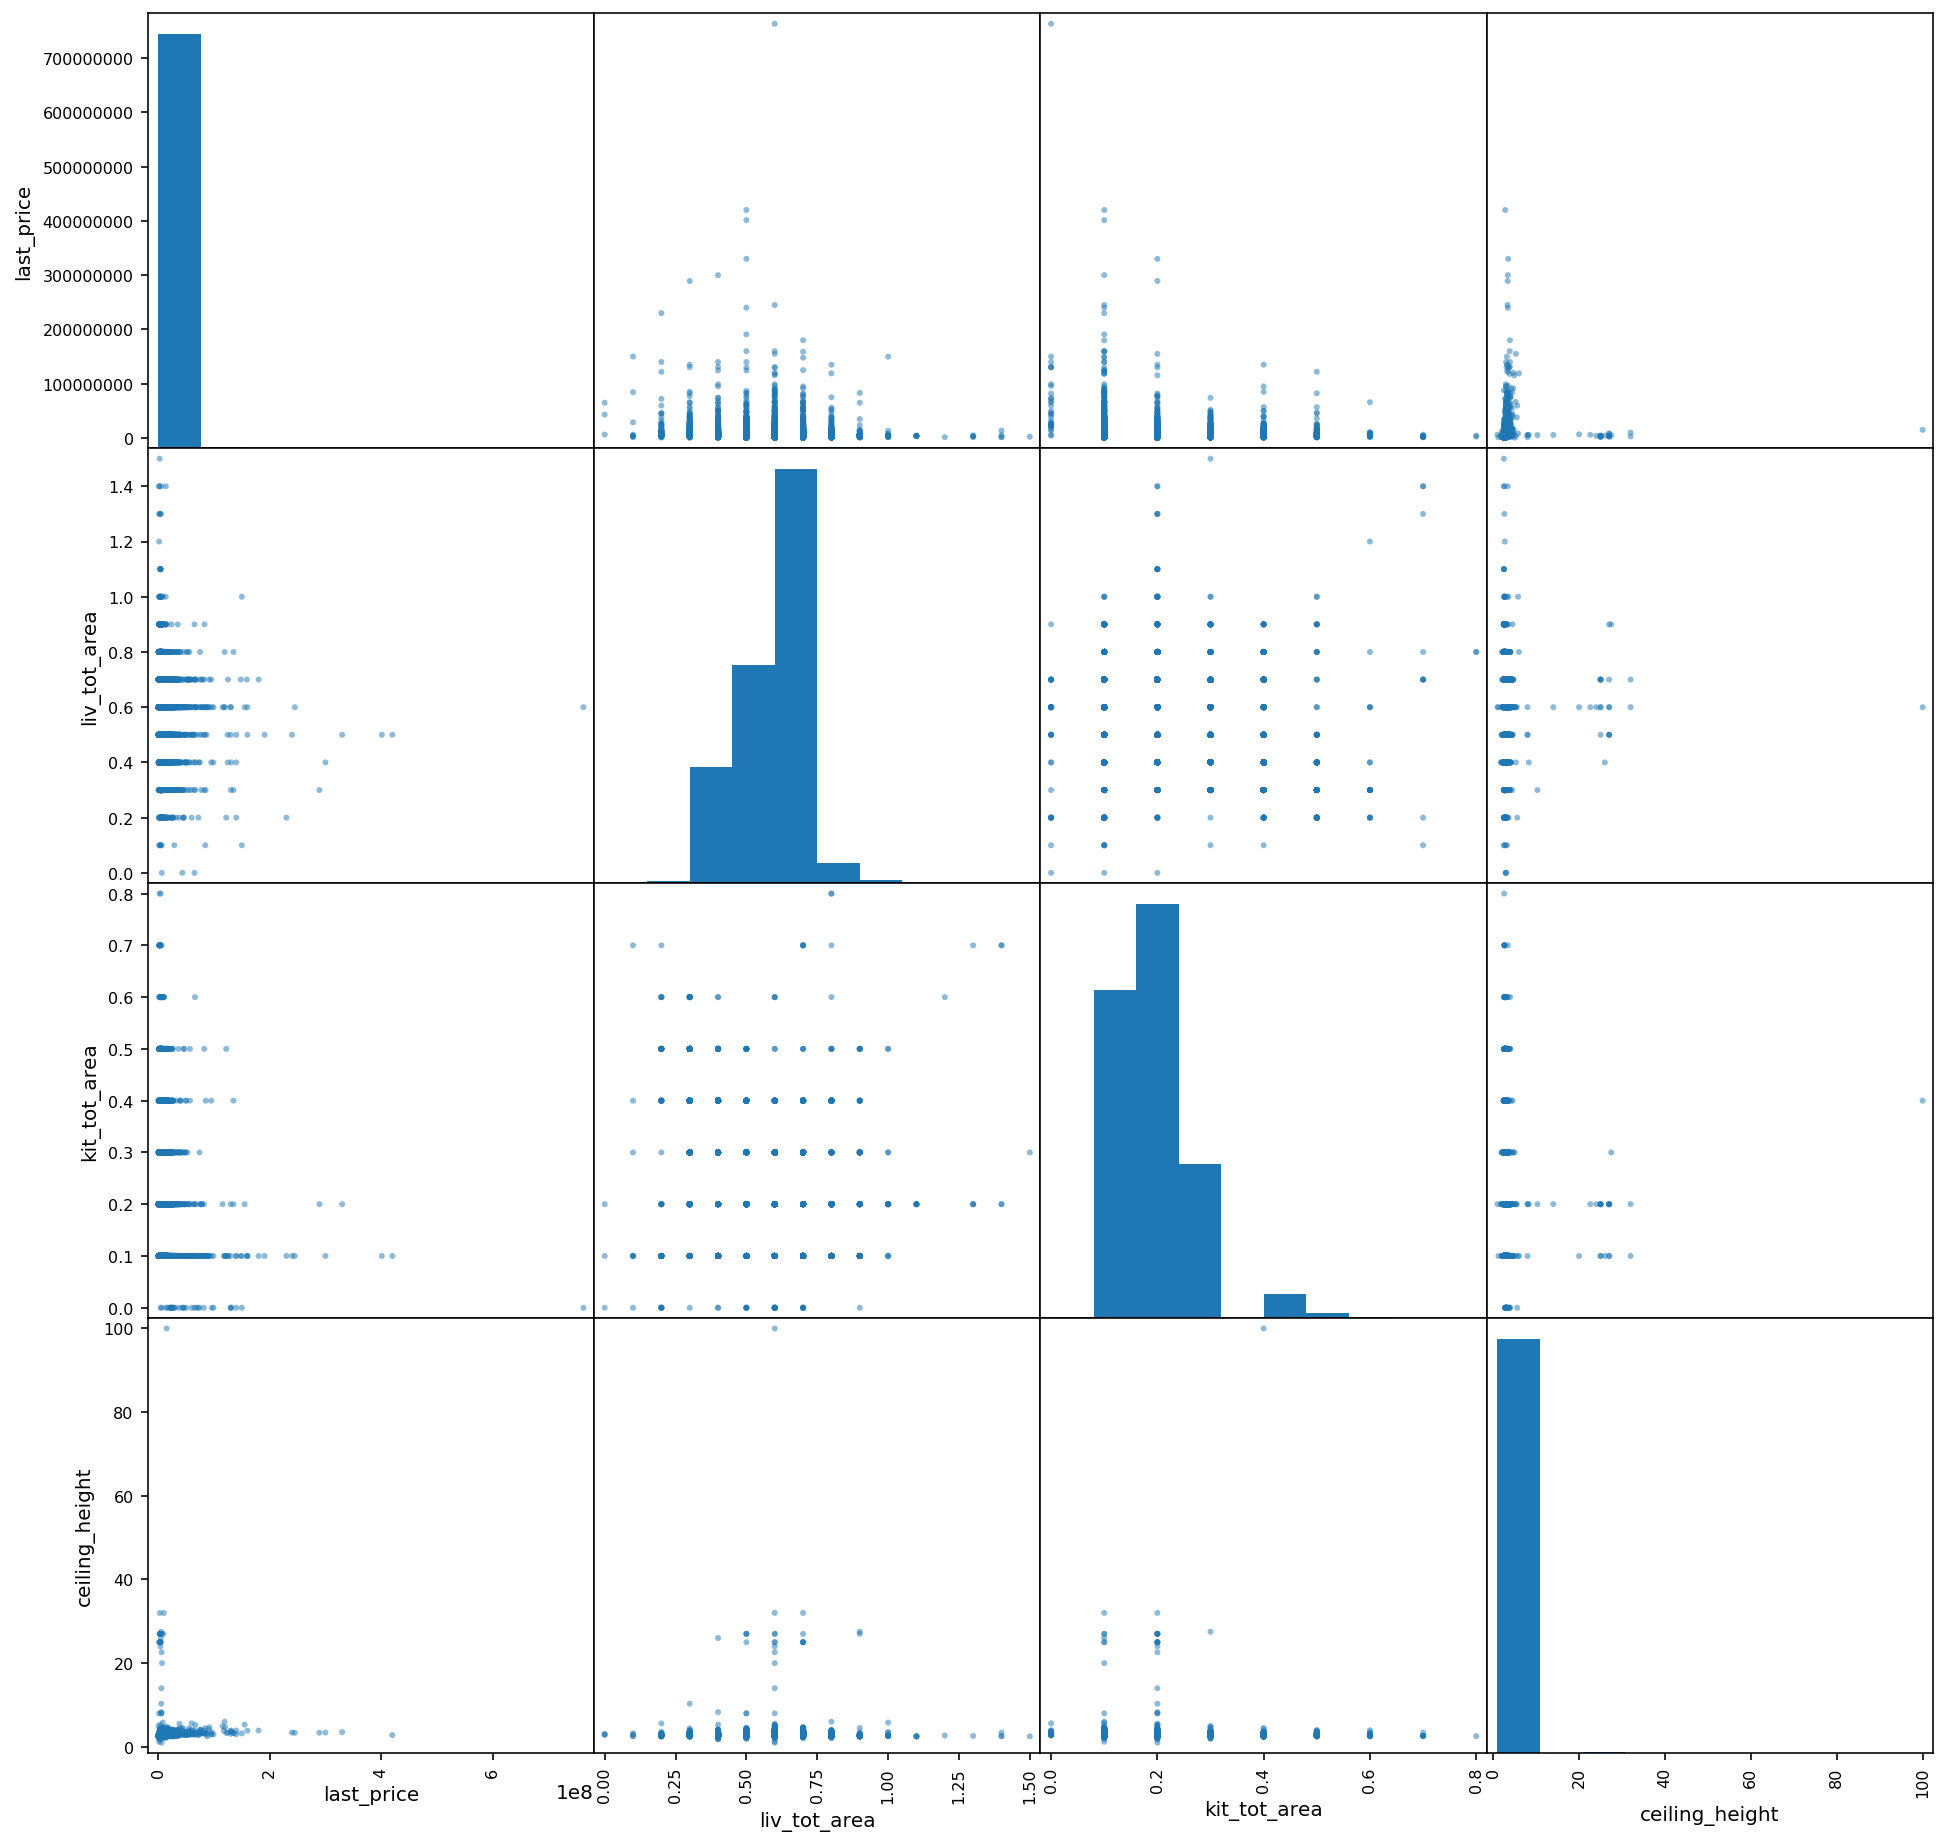

In [56]:
pd.plotting.scatter_matrix(df_no_vibros[['last_price','liv_tot_area','kit_tot_area','ceiling_height']], figsize=(16, 16)) 
plt.show()

In [57]:
df_no_vibros[['last_price','liv_tot_area','kit_tot_area','ceiling_height']].corr()

,last_price,liv_tot_area,kit_tot_area,ceiling_height
last_price,1.000000,-0.031315,-0.104931,0.085143
liv_tot_area,-0.031315,1.000000,-0.504480,0.008500
kit_tot_area,-0.104931,-0.504480,1.000000,0.009686
ceiling_height,0.085143,0.008500,0.009686,1.000000


Чтож как видно из графиков прямой зависимости между данными нет

Построиим сводную таблицу и посмотрим медиану и общее количество этажей относительно цены

In [58]:
floor_temp = df_no_vibros.pivot_table(index='floor_group',values='price_square_meter',aggfunc=['median','count'])
floor_temp

,median,count
,price_square_meter,price_square_meter
floor_group,,
Другие,98496.6,16102
Первый,81861.6,2693
Последний,88687.2,3105


Здесь мы видим, цена на квартиры выше у группы другие, затем идет как ни странно первый этаж и самый не дорогой оказывается последний этаж в доме.

Найдем зависимость медианы цены размещения от дня недели во всей области не включая центр питера, далее мы определим, что к кентру относится диапазон от 0 до 8 км

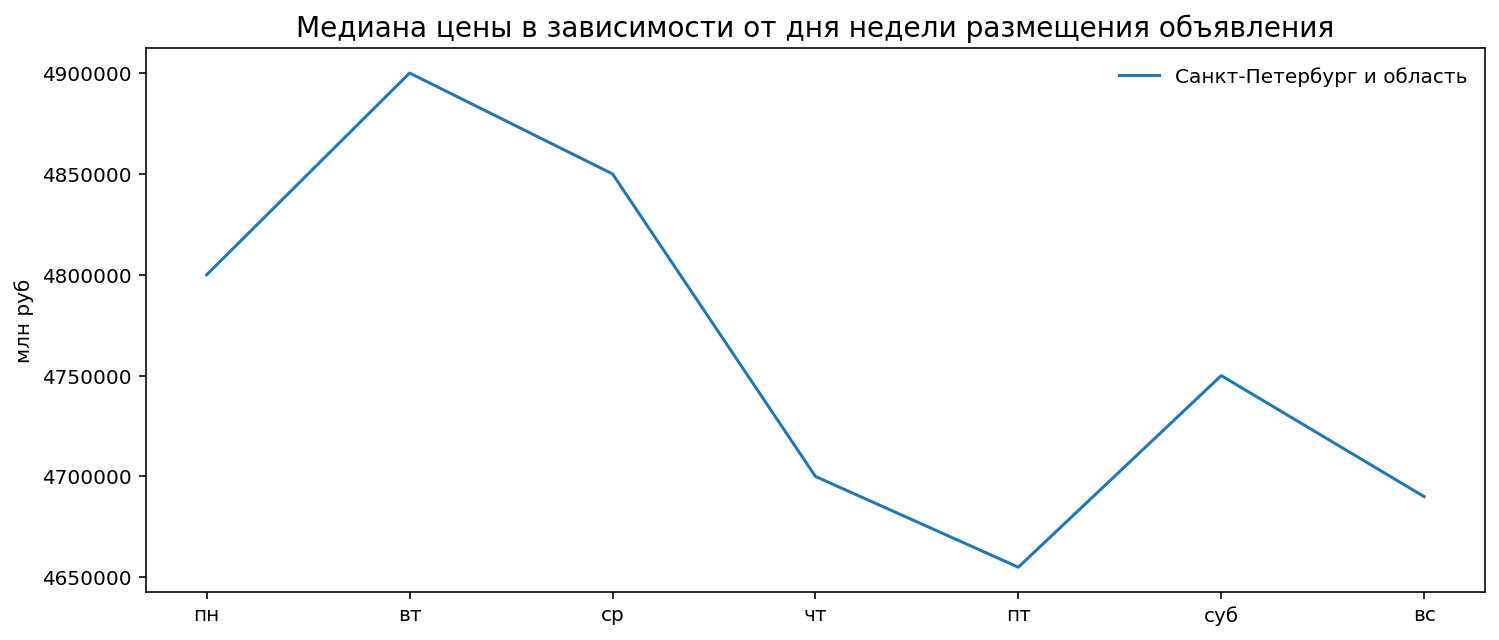

In [59]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x = ['пн', 'вт', 'ср', 'чт', 'пт', 'суб', 'вс']
a = df_no_vibros[df_no_vibros['sp_center']>8].pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')

ax.set_ylabel('млн руб')
ax.set_title('Медиана цены в зависимости от дня недели размещения объявления')
ax.title.set_size(14)
ax.plot(x, a, label='Санкт-Петербург и область')

ax.legend(frameon=False)
plt.show()

Из графика видно, что цена действительно варьируется в зависимости от дня недели размещения объявления, самые дорогие дни это: вторник, затем среда и понедельник, самые дешевые дни: пятница, затем воскресенье и суббота.

Найдем зависимость цены от месяца размещения объявления

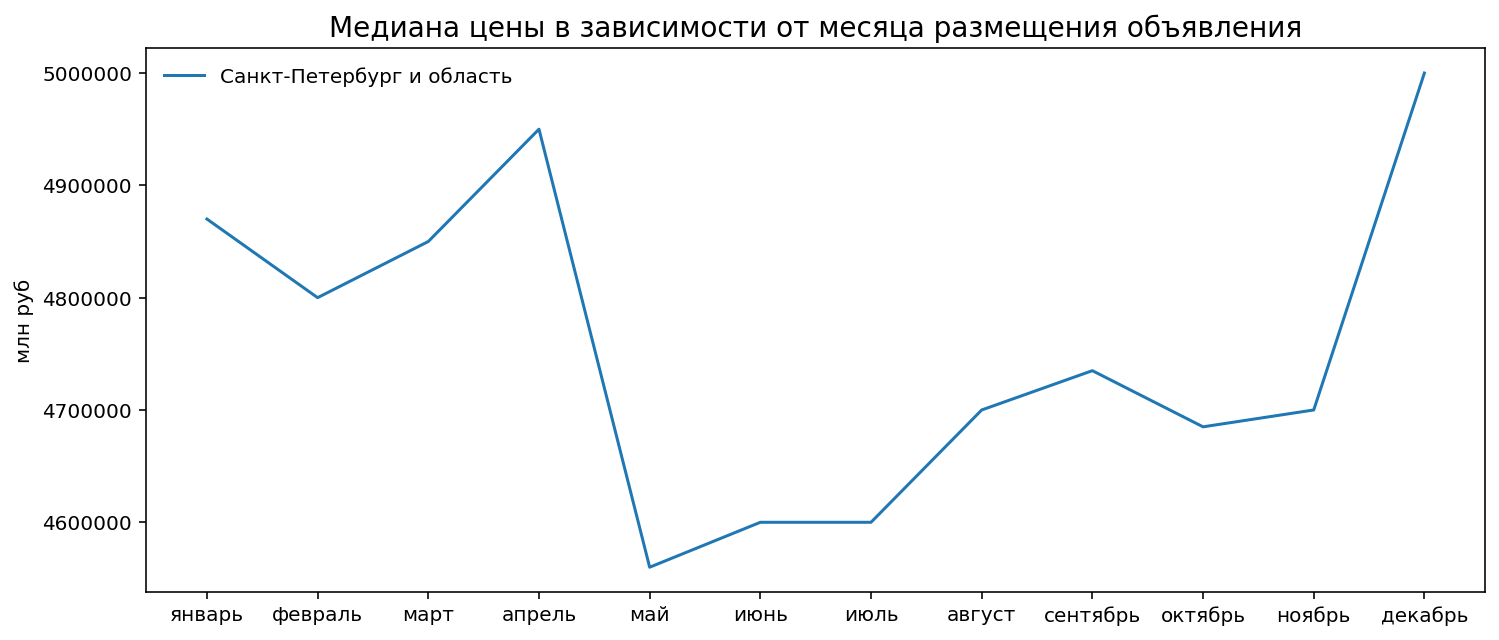

In [60]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль','август','сентябрь','октябрь','ноябрь','декабрь']
a = df_no_vibros[df_no_vibros['sp_center']>8].pivot_table(index='month_exposition', values='last_price', aggfunc='median')

ax.set_ylabel('млн руб')
ax.set_title('Медиана цены в зависимости от месяца размещения объявления')
ax.title.set_size(14)
ax.plot(x, a, label='Санкт-Петербург и область')

ax.legend(frameon=False)
plt.show()

Видно, что цена начинает рости с ноября месяца, достигая своего пика в декабре. С декабря по апрель цена не много колеблется, но в мае наблюдается резкая просадка и плавный подъем до ноября.

найдем медиану цены размещения в зависимости от года

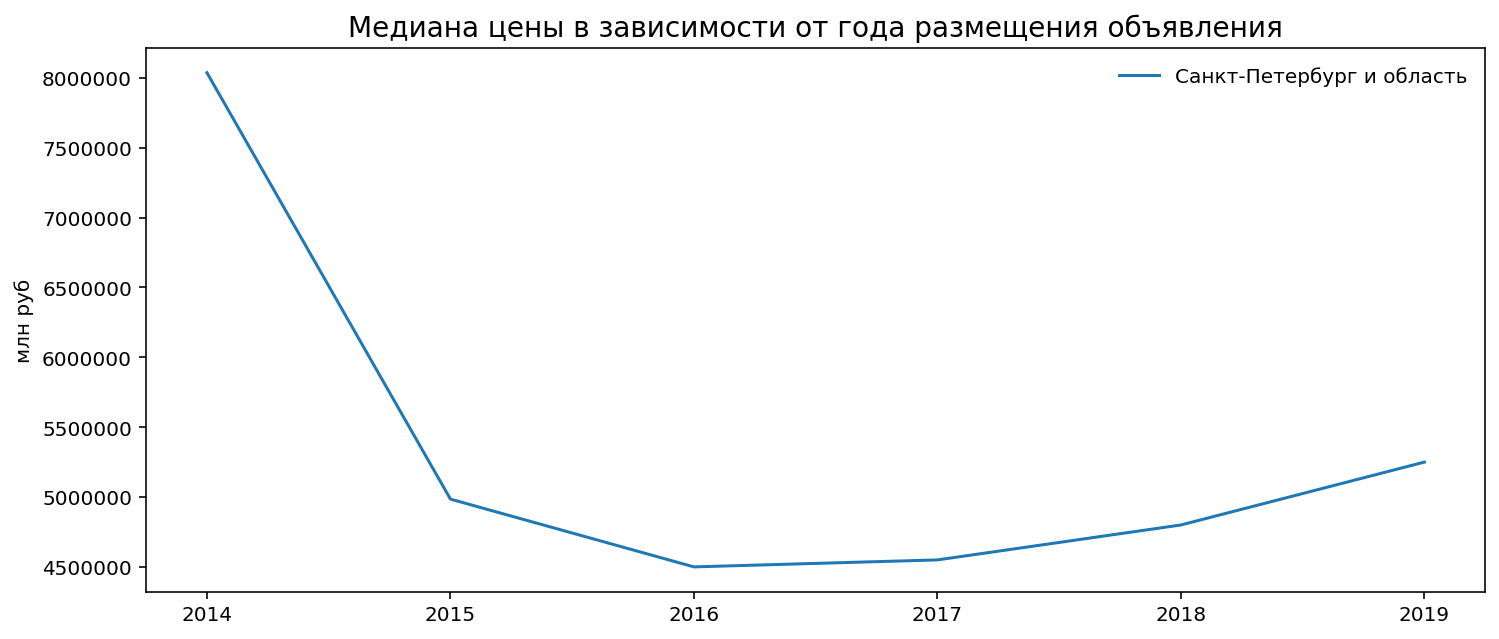

In [61]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x = ['2014','2015','2016','2017','2018','2019']
a = df_no_vibros[df_no_vibros['sp_center']>8].pivot_table(index='year_exposition', values='last_price', aggfunc='median')

ax.set_ylabel('млн руб')
ax.set_title('Медиана цены в зависимости от года размещения объявления')
ax.title.set_size(14)
ax.plot(x, a, label='Санкт-Петербург и область')

ax.legend(frameon=False)
plt.show()

Чтож, мы видим что пик цен приходился до 2014 года, а в начале 2014 цена начала падать вплоть до 2016, видимо валютный кризис очень сильно отразился на ценах на недвижимость. И только в 2017 году цены начали плавно восстанавливаться, но так и не пришли на до кризисный уровень на начало 2019 года.

Посмотрим так же на зависимость цены за квадратный метр от даты размещения за весь период

Мы видим, что в 2015 году основной разброс цены за кв метр был в районе 150т.р, хотя начиная с 2017 года цена стабильно начала расти и к концу 2019 подошла к отметке в 200 т.р. хотя конечно отдельные случаи доходят и до 500000. Но что очевидно, дак это то, что с каждым годом число объявлений растет.

Найдем 10 населенных пунктов с самым большим количеством объявлений.

In [62]:
df_no_vibros['locality_name'].value_counts().sort_values(ascending=False).head(10)

Санкт-Петербург    14737
Мурино               545
Кудрово              416
Шушары               403
Всеволожск           368
Пушкин               353
Колпино              306
Парголово            288
Гатчина              284
Выборг               209
Name: locality_name, dtype: int64

Создадим таблицу по населенным пунктам и посчитаем цену за квадратный метр в каждом городе

In [63]:
top_city = df_no_vibros.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count','median'])

In [64]:
top_city.columns = ['count','median']

In [65]:
top_city.sort_values('count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,14737,104798.00
Мурино,545,85714.30
Кудрово,416,95067.05
Шушары,403,76923.10
Всеволожск,368,65525.80
Пушкин,353,100000.00
Колпино,306,75000.00
Парголово,288,92294.90
Гатчина,284,67417.30


Мы видим, что самая большая цена за квадратный метр в Санкт-Петербурге что в принципе и не удивительно, а самая низкая в Выборге и разница в цене практически в 2 раза

Создадим таблицу только для Санкт-Петербурга

In [66]:
sp_df = df_no_vibros.query('locality_name in ("Санкт-Петербург")')
sp_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_square_meter,day_exposition,floor_group,liv_tot_area,kit_tot_area,sp_center,weekday_exposition,month_exposition,year_exposition,temp_days
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,120370.4,2019-03-07,Другие,0.5,0.2,16.0,3,3,2019,NaN
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.3,4,False,...,92785.7,2015-08-20,Другие,0.6,0.1,14.0,3,8,2015,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,45.0,9,False,...,408176.1,2015-07-24,Другие,0.3,0.1,7.0,4,7,2015,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,100000.0,2018-06-19,Другие,0.3,0.4,8.0,1,6,2018,121.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24,30.5,22,False,...,110544.7,2019-04-18,Другие,0.4,0.3,12.0,3,4,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23496,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15,16.3,4,False,...,100566.6,2018-02-28,Другие,0.5,0.3,16.0,2,2,2018,29.0
23497,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5,31.0,2,False,...,105769.2,2018-07-19,Другие,0.6,0.1,6.0,3,7,2018,15.0
23498,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25,40.3,7,False,...,129904.0,2016-10-13,Другие,0.6,0.1,4.0,3,10,2016,519.0
23501,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,False,...,72490.8,2017-03-21,Другие,0.5,0.1,4.0,1,3,2017,NaN


In [67]:
sp_df['sp_center'] = sp_df['sp_center'].astype('int64')#Приведем столбец к целочисленному виду

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
sp_df.head()#Проверим сработала ли формула

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_square_meter,day_exposition,floor_group,liv_tot_area,kit_tot_area,sp_center,weekday_exposition,month_exposition,year_exposition,temp_days
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,120370.4,2019-03-07,Другие,0.5,0.2,16,3,3,2019,NaN
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,False,...,92785.7,2015-08-20,Другие,0.6,0.1,14,3,8,2015,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,45.0,9,False,...,408176.1,2015-07-24,Другие,0.3,0.1,7,4,7,2015,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,100000.0,2018-06-19,Другие,0.3,0.4,8,1,6,2018,121.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24,30.5,22,False,...,110544.7,2019-04-18,Другие,0.4,0.3,12,3,4,2019,NaN


In [69]:
km_price = sp_df.pivot_table(index='sp_center', values='last_price', aggfunc='median').sort_values(by='last_price',ascending=False)

In [70]:
 km_price.reset_index(inplace=True)

Найдем цену каждого километра

In [71]:
km_price['km_1_price']=km_price['last_price']/ km_price['sp_center']

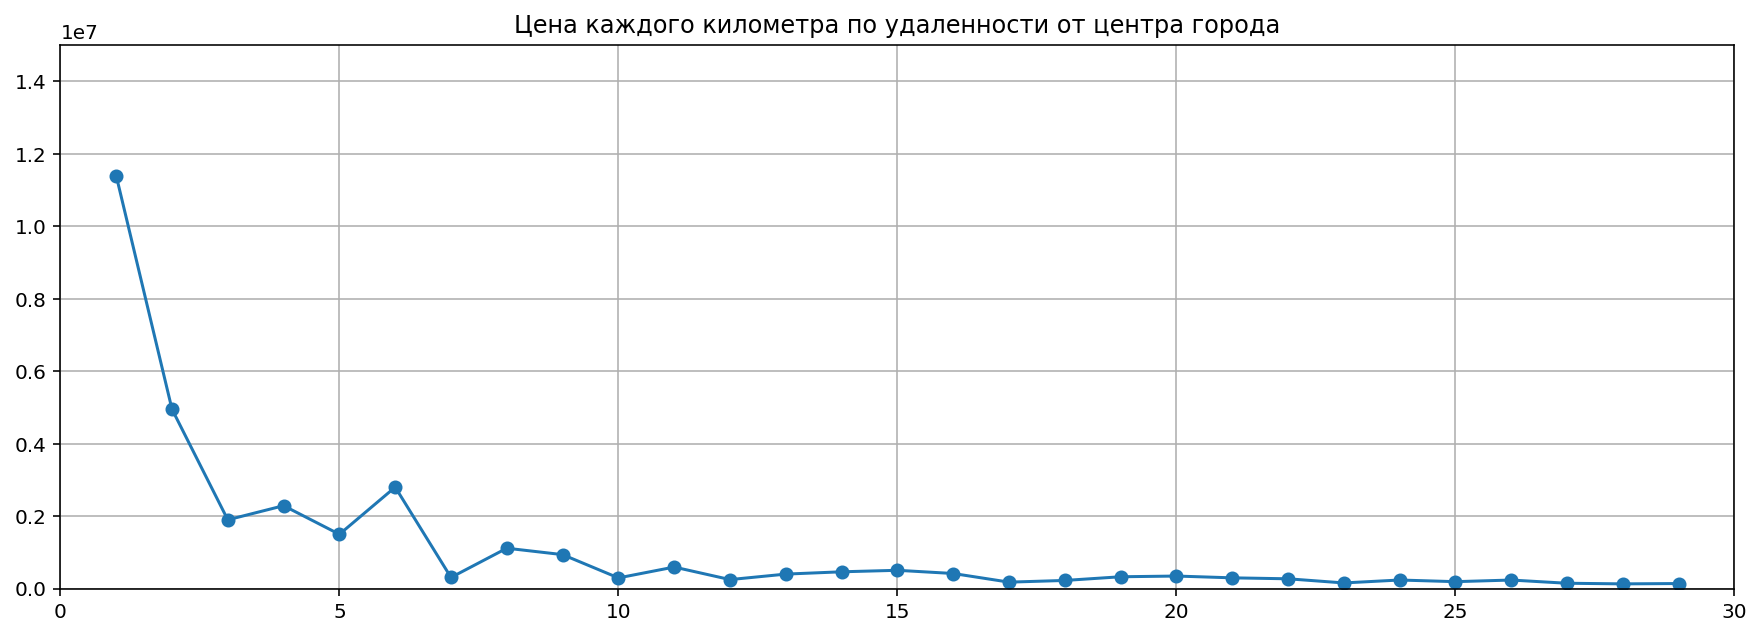

In [72]:
km_price['km_1_price'].plot(style='o-',xlim=(0, 30), ylim=(0, 15000000), grid=True, figsize=(15, 5), title ='Цена каждого километра по удаленности от центра города')
plt.show()

По графику видно, что как и ожидалось близко к центру стоимость 1км очень большая, до 3х она резко снижается до 8 еще не много скачет, а после 8 и вовсе плавно идет на спад

In [73]:
km_price = sp_df.pivot_table(index='sp_center', values='last_price', aggfunc='median').sort_values('last_price', ascending=False)

Посмотрим как меняется цена квартиры на протяжении всего расстояния от центра до окраин в Санкт-Петербурге

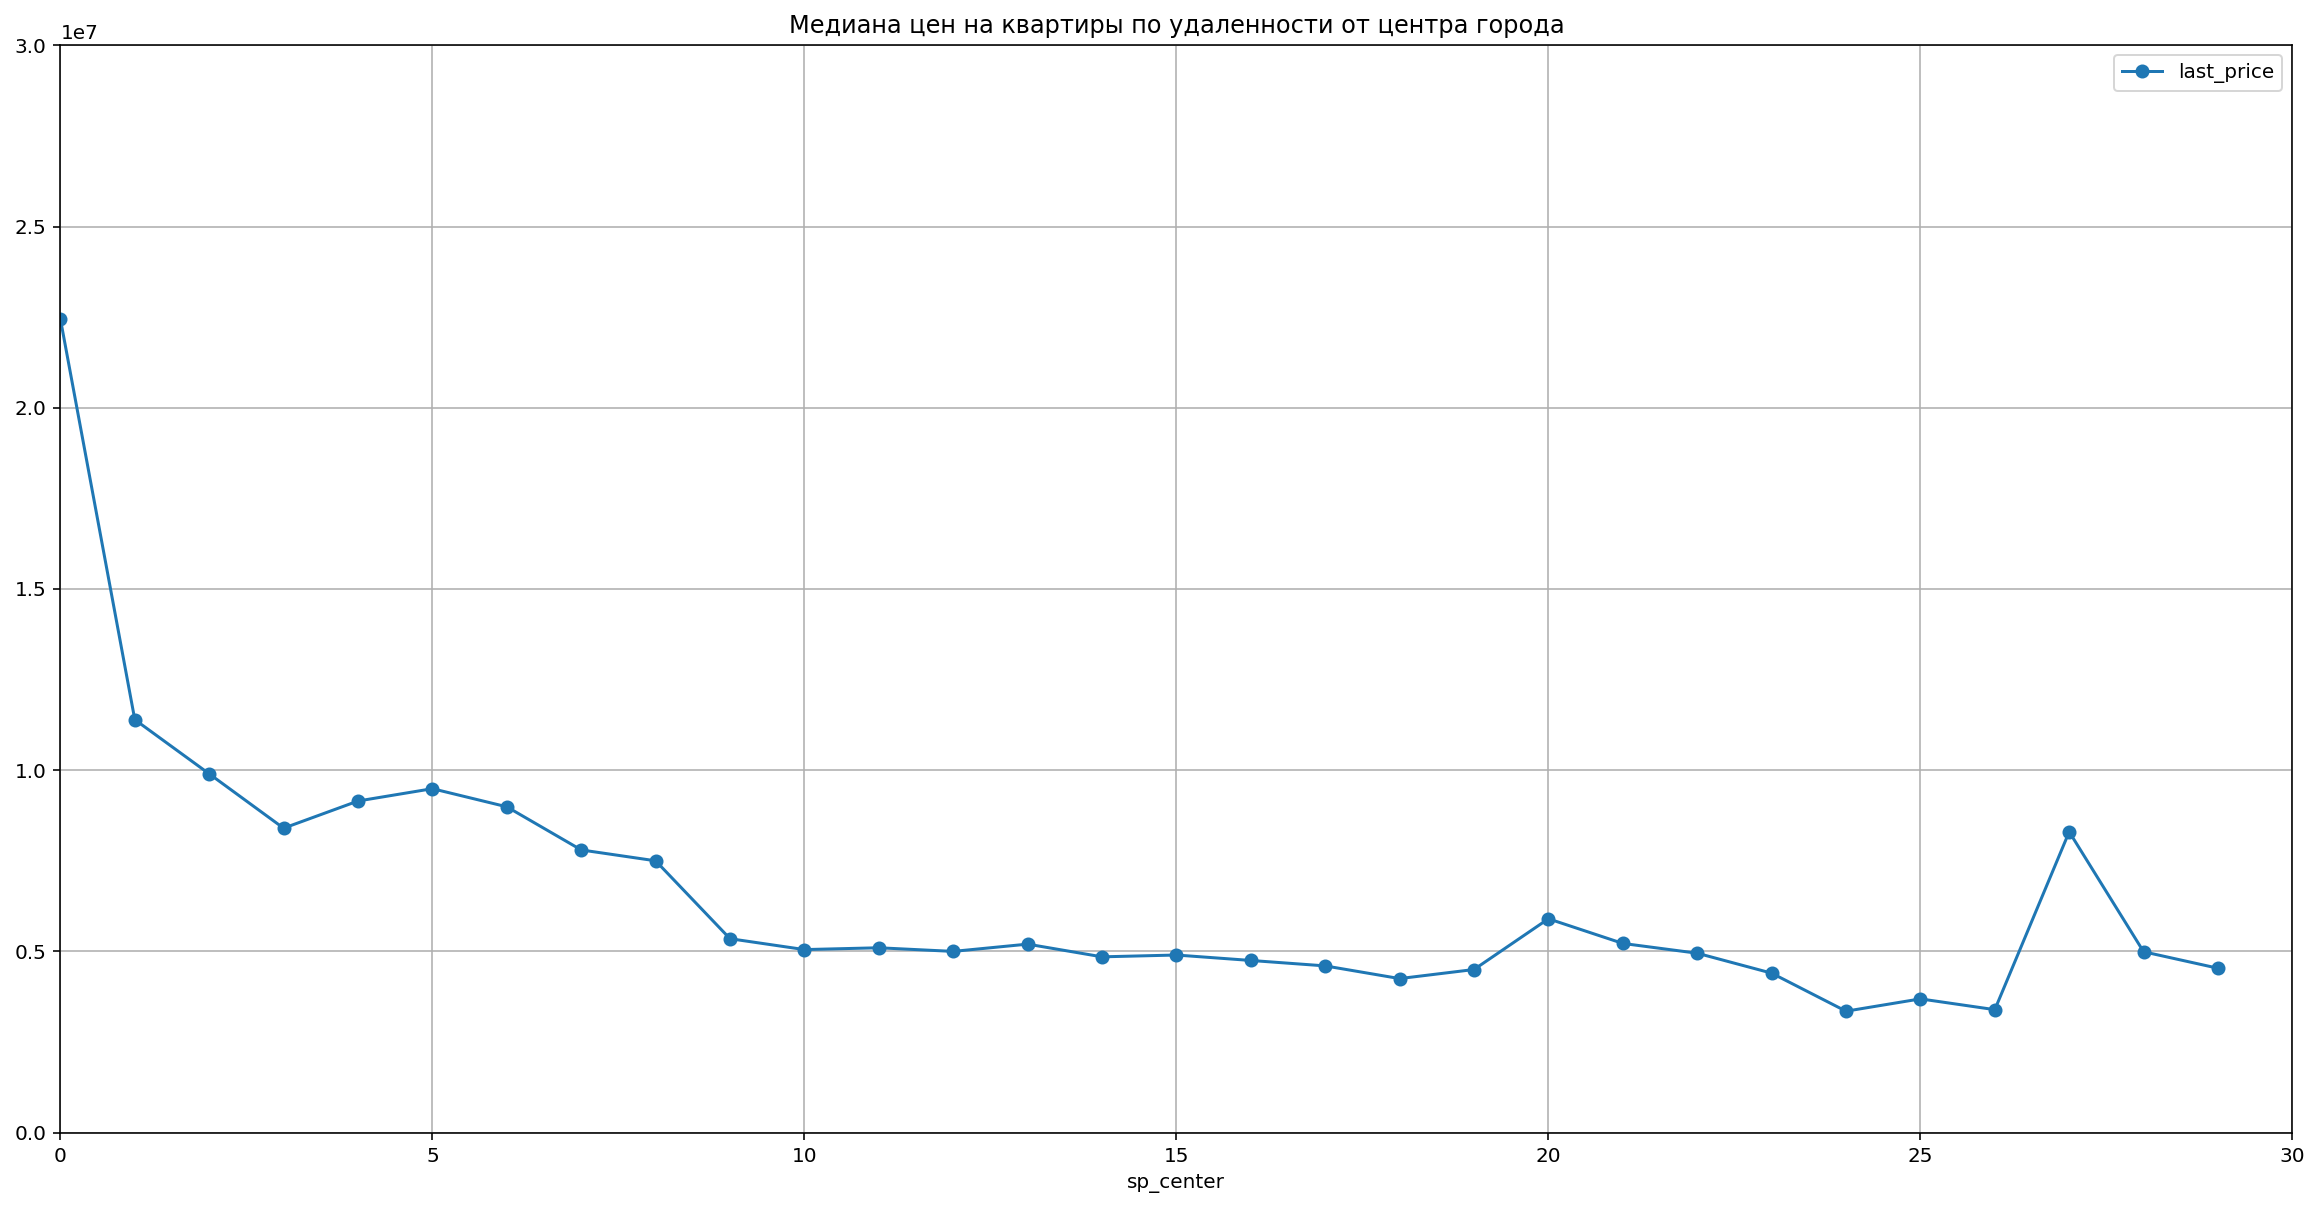

In [74]:
sp_df.pivot_table(index='sp_center', values='last_price', aggfunc='median').plot(style='o-',xlim=(0, 30), ylim=(0, 30000000), grid=True, figsize=(20, 10), title ='Медиана цен на квартиры по удаленности от центра города')
plt.show()

Здесь уже  мы видим, что к центру относится все таки расстояние от 0 до примерно 8 км, затем цена плавно снижается.

Сделаем выборку по квартирам относящимся только к центру, а именно до 8 км.

In [75]:
sp_df_cen = sp_df.loc[sp_df['sp_center']<=8]
sp_df_cen

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_square_meter,day_exposition,floor_group,liv_tot_area,kit_tot_area,sp_center,weekday_exposition,month_exposition,year_exposition,temp_days
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,45.0,9,False,...,408176.1,2015-07-24,Другие,0.3,0.1,7,4,7,2015,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,100000.0,2018-06-19,Другие,0.3,0.4,8,1,6,2018,121.0
24,8,6500000.0,97.20,2015-10-31T00:00:00,2,NaN,3,46.5,1,False,...,66872.4,2015-10-31,Первый,0.5,0.2,2,5,10,2015,265.0
35,6,15500000.0,149.00,2017-06-26T00:00:00,5,NaN,5,104.0,4,False,...,104026.8,2017-06-26,Другие,0.7,0.1,4,0,6,2017,644.0
51,7,45000000.0,161.00,2017-10-17T00:00:00,3,3.20,8,38.0,4,False,...,279503.1,2017-10-17,Другие,0.2,0.3,7,1,10,2017,541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23472,11,4250000.0,47.00,2016-05-20T00:00:00,1,NaN,6,18.2,1,False,...,90425.5,2016-05-20,Первый,0.4,0.3,5,4,5,2016,131.0
23488,13,5250000.0,43.00,2018-05-11T00:00:00,2,2.50,5,29.0,2,False,...,122093.0,2018-05-11,Другие,0.7,0.1,7,4,5,2018,80.0
23497,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5,31.0,2,False,...,105769.2,2018-07-19,Другие,0.6,0.1,6,3,7,2018,15.0
23498,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25,40.3,7,False,...,129904.0,2016-10-13,Другие,0.6,0.1,4,3,10,2016,519.0


Передаим списком интересующие нас значения, составим гистограммы и посмотрим есть ли зависимости цены от каких либо деталей

In [76]:
a =sp_df_cen[['total_area','ceiling_height','rooms','last_price','sp_center']]

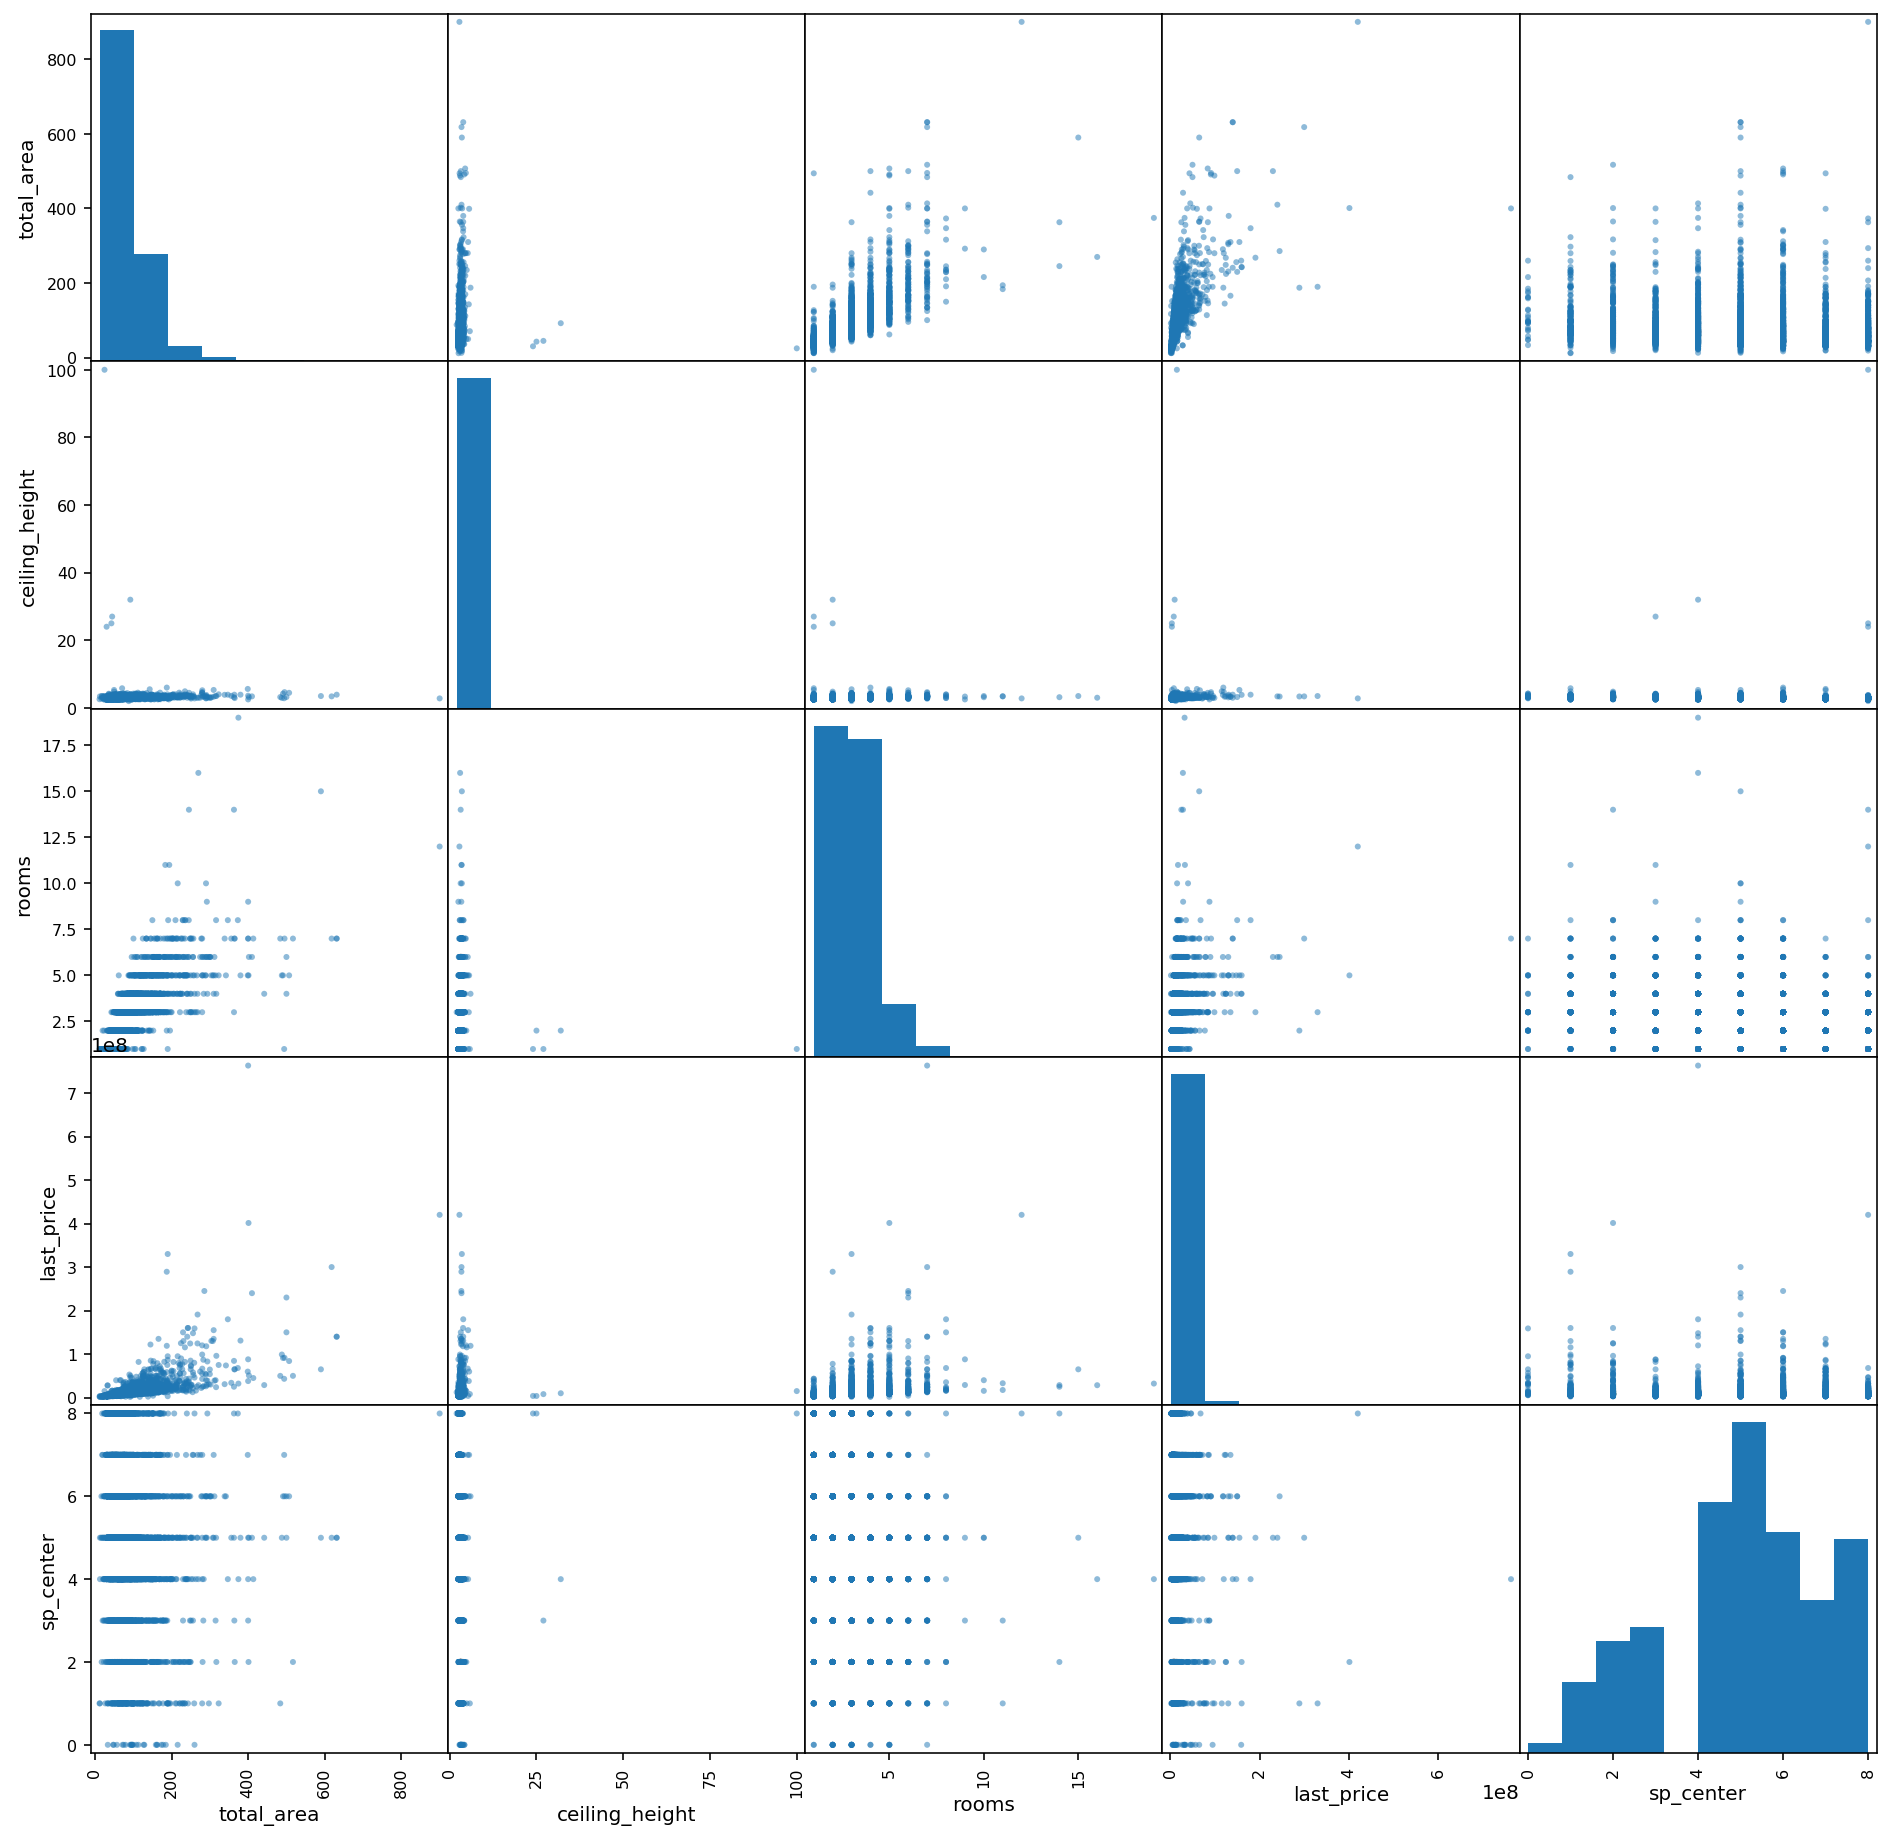

In [77]:
pd.plotting.scatter_matrix(a, figsize=(16, 16)) 
plt.show()

In [78]:
a.corr()

,total_area,ceiling_height,rooms,last_price,sp_center
total_area,1.000000,0.032704,0.746419,0.641339,-0.127266
ceiling_height,0.032704,1.000000,0.014429,0.038028,-0.026042
rooms,0.746419,0.014429,1.000000,0.342770,-0.189543
last_price,0.641339,0.038028,0.342770,1.000000,-0.075437
sp_center,-0.127266,-0.026042,-0.189543,-0.075437,1.000000


Мы видим, что на цене сказывается площадь квартиры и гораздо меньше количество комнат, а вот высота потолков на цену никак не влияет.

Построим такой же график для других параметров

In [79]:
a =sp_df_cen[['floor','day_exposition','sp_center','last_price']]

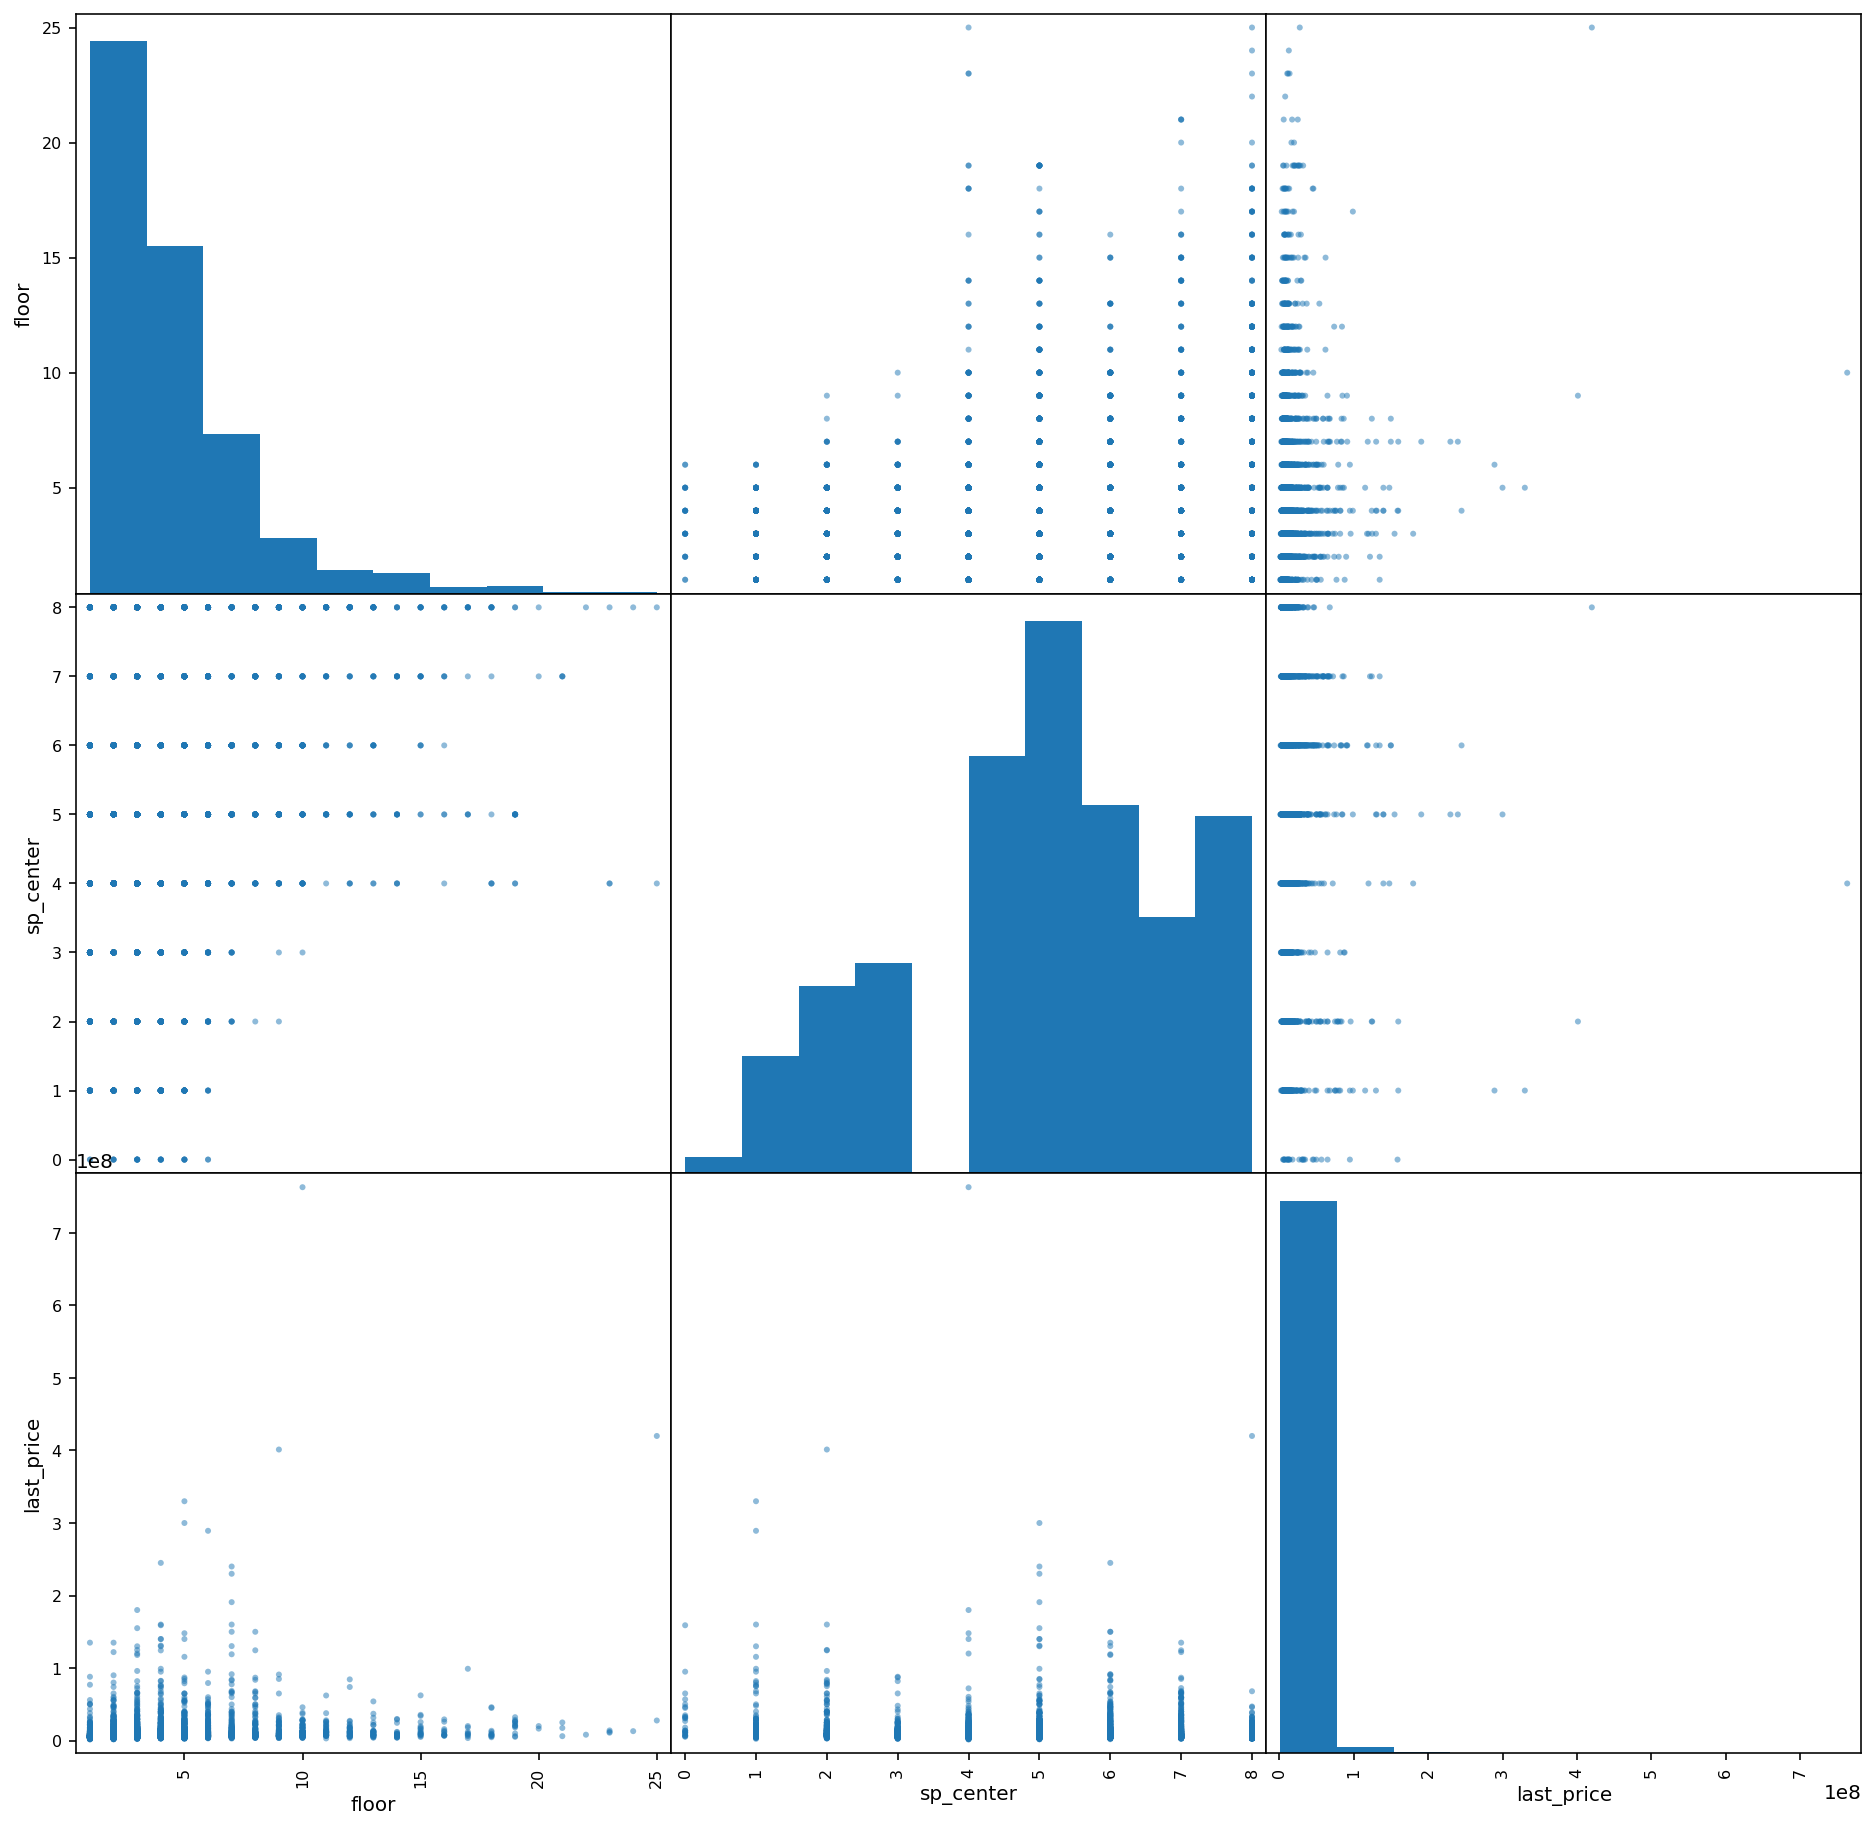

In [80]:
pd.plotting.scatter_matrix(sp_df_cen[['floor','sp_center','last_price']], figsize=(16, 16)) 
plt.show()

In [81]:
sp_df_cen[['floor','day_exposition','sp_center','last_price']].corr()

,floor,sp_center,last_price
floor,1.000000,0.270255,0.116674
sp_center,0.270255,1.000000,-0.075437
last_price,0.116674,-0.075437,1.000000


На этом графике зависимостей практически нет.

Посмотрим зависимость цены от года размещения, отдельно центр, остальной город и область

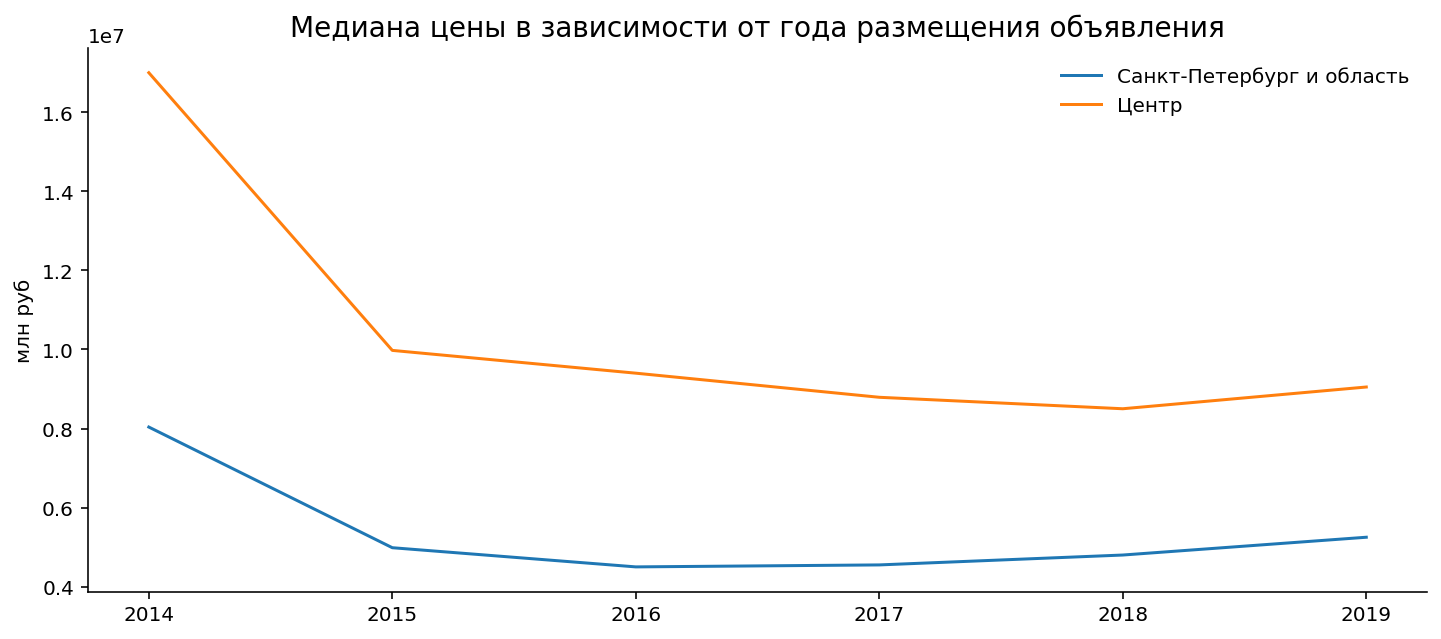

In [82]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x = ['2014','2015','2016','2017','2018','2019']
a = df_no_vibros[df_no_vibros['sp_center']>8].pivot_table(index='year_exposition', values='last_price', aggfunc='median')
b = sp_df_cen.pivot_table(index='year_exposition', values='last_price', aggfunc='median')

ax.set_ylabel('млн руб')
ax.set_title('Медиана цены в зависимости от года размещения объявления')
ax.title.set_size(14)
ax.plot(x, a, label='Санкт-Петербург и область')
ax.plot(x, b, label='Центр')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.legend(frameon=False)
plt.show()

Мы видим, что валютный кризис отразился на недвижимости в центре гораздо сильнее чем на остальных районах, если весь город и область начали "приходить в себя" еще в 2016 году, то центральная недвижимость просидала вплоть до 2018 года и только после этого цены начали рости

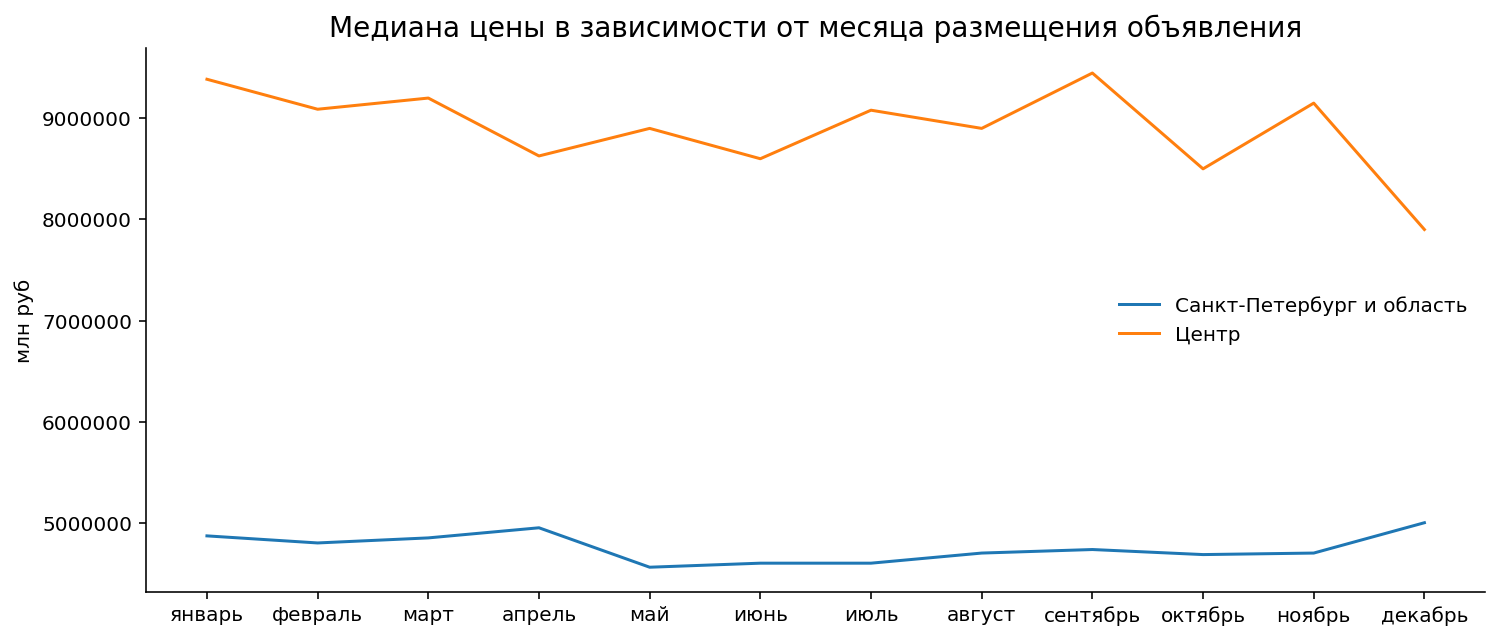

In [83]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль','август','сентябрь','октябрь','ноябрь','декабрь']
a = df_no_vibros[df_no_vibros['sp_center']>8].pivot_table(index='month_exposition', values='last_price', aggfunc='median')
b = sp_df_cen.pivot_table(index='month_exposition', values='last_price', aggfunc='median')

ax.set_ylabel('млн руб')
ax.set_title('Медиана цены в зависимости от месяца размещения объявления')
ax.title.set_size(14)
ax.plot(x, a, label='Санкт-Петербург и область')
ax.plot(x, b, label='Центр')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.legend(frameon=False)
plt.show()

На этом графике мы видим, что цена недвижимости в центре больше подвержена изменениям, она постоянно плавает во время всего года, а в декабре довольно сильно просаживается. А вот в области зимой и до апреля стабильно наблюдается подъем цен и в апреле они снижаются.

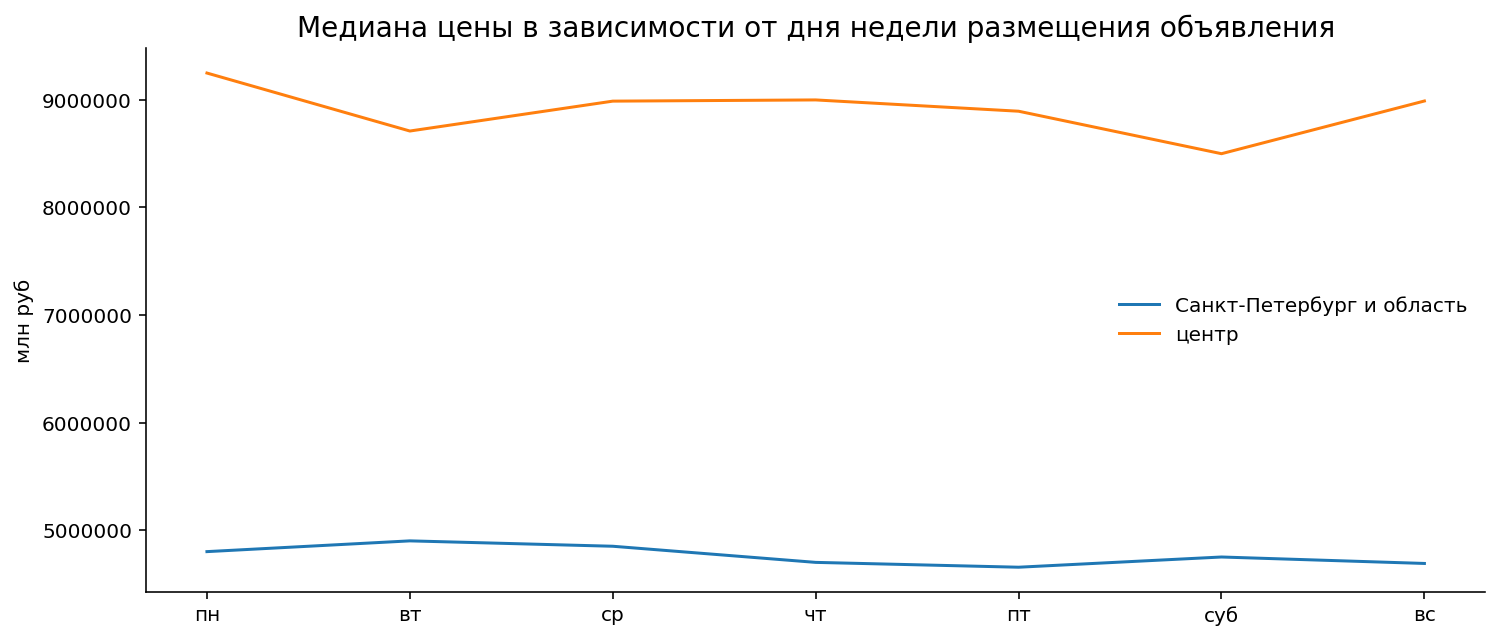

In [84]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x = ['пн', 'вт', 'ср', 'чт', 'пт', 'суб', 'вс']
a = df_no_vibros[df_no_vibros['sp_center']>8].pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
b = sp_df_cen.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')

ax.set_ylabel('млн руб')
ax.set_title('Медиана цены в зависимости от дня недели размещения объявления')
ax.title.set_size(14)
ax.plot(x, a, label='Санкт-Петербург и область')
ax.plot(x, b, label='центр')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.legend(frameon=False)
plt.show()

Если в области наблюдается просадка по цене в пятницу и воскресенье, то в центре это вторник и суббота, так же в центре цена более подвержена изменениям

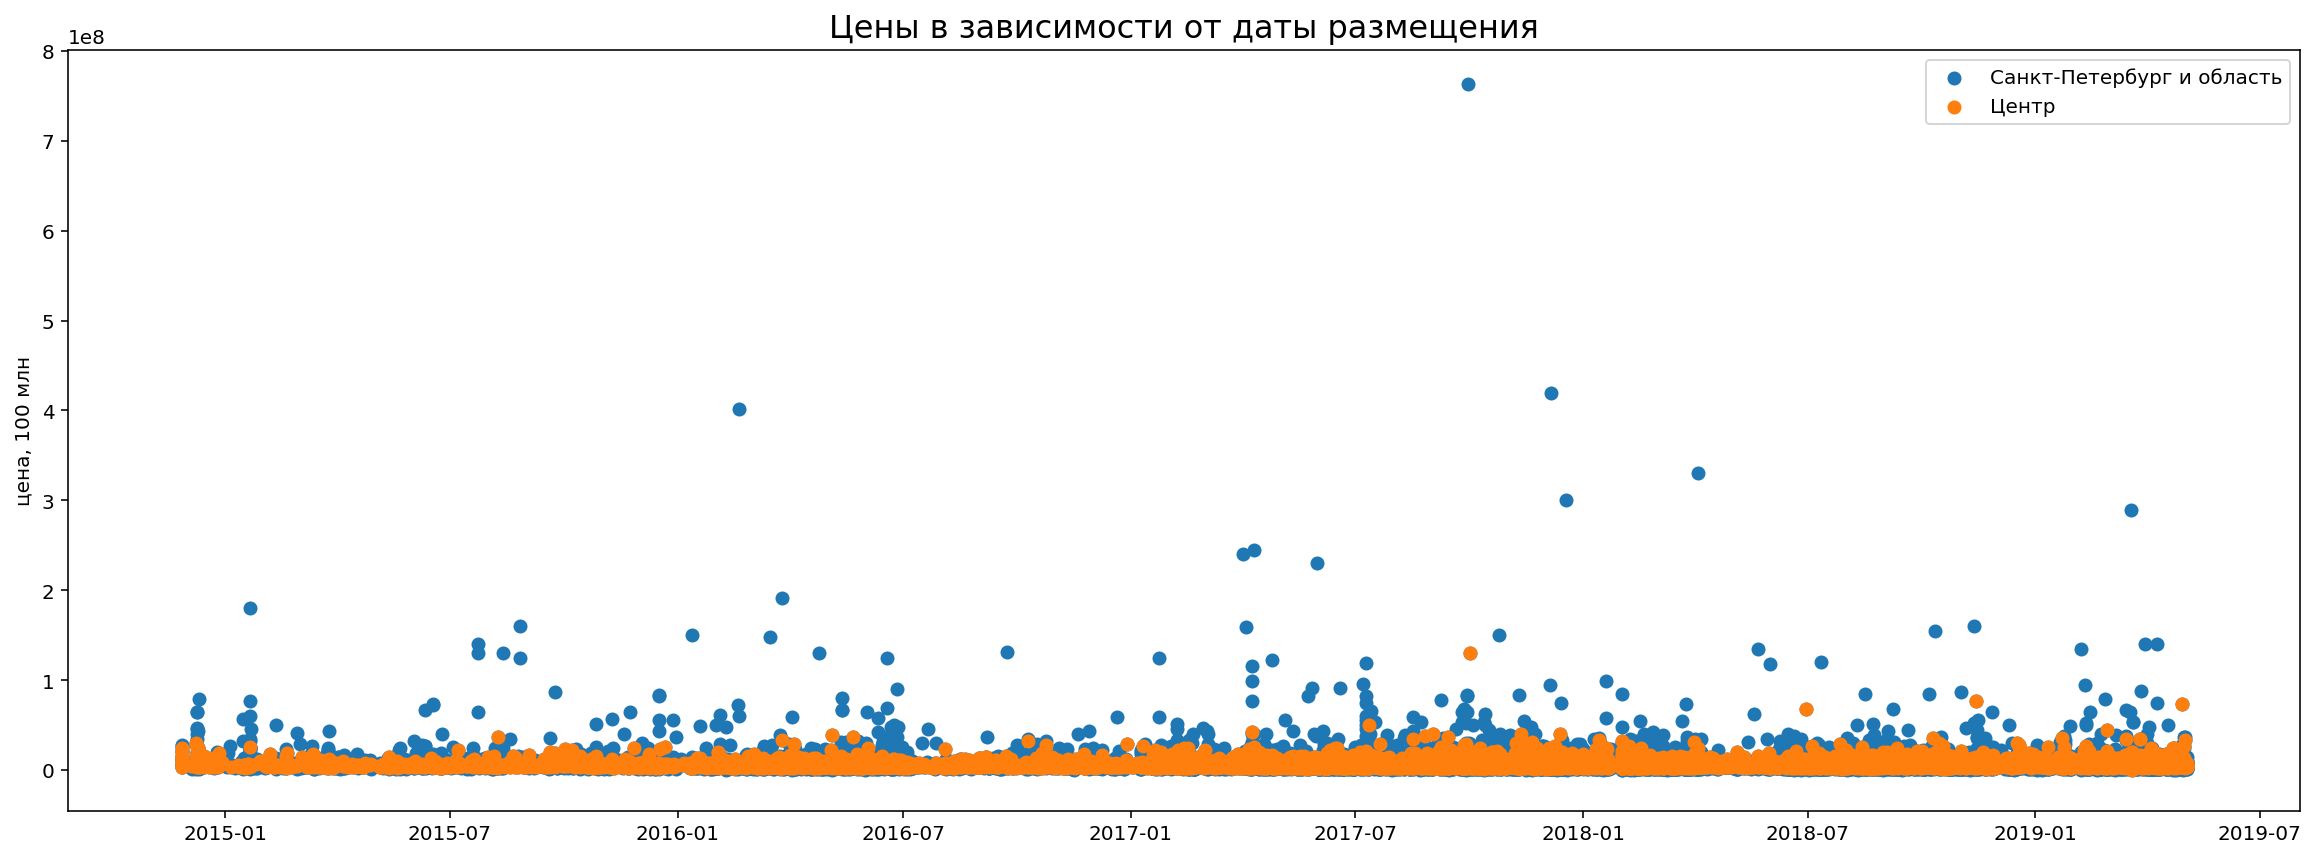

In [85]:
fig, ax = plt.subplots(figsize=(20,7))
ax.scatter(df_no_vibros['day_exposition'],df_no_vibros['last_price'],label='Санкт-Петербург и область')
ax.scatter(df_no_vibros[df_no_vibros['sp_center']>8]['day_exposition'],df_no_vibros[df_no_vibros['sp_center']>8]['last_price'], label='Центр')

ax.set_ylabel('цена, 100 млн')
ax.set_title('Цены в зависимости от даты размещения')
ax.title.set_size(16)
ax.legend()
plt.show()

Судя по общему графику видно, что цена в центре находится примерно на одном уровне, хотя в остальном городе и области цена довольно сильно скачет. Причем зимой и летом в основном наблюдается повышение цены, а вот весной и осенью понижение

**Вывод:** Мы проверили от чего варьируется цена по региону и конкрето в центре города, и можно сказать, что на цену влияет удаленность от центра города, площадь квартиры, в каком именно населенном пункте она находится, а так же от дня недели, месяца и даже года.

## Общий вывод

Мы провели анализ чтобы понять из чего складывается рыночная стоимость объектов недвижимости. Мы определили, что на стоимость объектов влияет расположение объекта, удаленность от центра и площадь недвижимости. Так же как оказывается на цену влияет дата выставления вплоть до дня недели, причем дни недели зависят от удаленности от центра города. Например самая дешевая квартира в центре была выставлена в конце декабря во вторник или субботу, когда например в других районах города и области это будет май пятница. Года тоже оказывают свое влияние на цену, как оказалось в области самые дешевые квартиры были в 2016, в центре в 2018, но что их объединяет, дак это кризис 2015 года, когда цены на недвижимость резко пошли вниз. Таким образом если вы хотели себе квартиру, то самое удачное время было в 2016 году в мае в пятницу. А в центре 2018 год декабрь, вторник или суббота.